In [37]:
import pandas as pd

In [38]:
import pyfolio

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
%matplotlib inline

In [40]:
# training start at 2009-01-01, validation start at 2015-10-01, trading start at 2016-01-01 and end to 2020-05-08
df = pd.read_csv('data/dow_30_2009_2020.csv')
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [41]:
df_trade_date[63:]

datadate
63    20160104
64    20160105
65    20160106
66    20160107
67    20160108
...        ...
1193  20200630
1194  20200701
1195  20200702
1196  20200706
1197  20200707

[1135 rows x 1 columns]

In [42]:
def get_account_value(rebalance_window, validation_window, data_name, model_name, model_name2, number):
    df_account_value = pd.DataFrame()
    for i in range(rebalance_window + validation_window, len(unique_trade_date)+1, rebalance_window):
        tmp = pd.read_csv(f'resultss/result_{data_name}_{model_name}_{number}/{data_name}_account_value_trade_{model_name2}_{i}.csv')
        df_account_value = df_account_value.append(tmp, ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    df_account_value = df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [43]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    return df

In [44]:
def backtest_strat(df):
    strategy_ret = df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date',drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

# DJI

In [45]:
dji = pd.read_csv('data/^DJI.csv')
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-07-07')]
test_dji.reset_index(drop=True, inplace=True)

In [46]:
test_dji['daily_return'] = test_dji['Adj Close'].pct_change(1)
test_dji['cumulative_return_djia'] = (test_dji["Adj Close"] - test_dji["Adj Close"][0])/test_dji["Adj Close"][0]
display(test_dji)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date         Open         High          Low        Close  \
0     2016-01-04  17405.48047  17405.48047  16957.63086  17148.93945   
1     2016-01-05  17147.50000  17195.83984  17038.60938  17158.66016   
2     2016-01-06  17154.83008  17154.83008  16817.61914  16906.50977   
3     2016-01-07  16888.35938  16888.35938  16463.63086  16514.09961   
4     2016-01-08  16519.16992  16651.89063  16314.57031  16346.45020   
...          ...          ...          ...          ...          ...   
1130  2020-06-30  25512.42969  25905.38086  25475.14063  25812.88086   
1131  2020-07-01  25879.38086  26019.31055  25713.60938  25734.97070   
1132  2020-07-02  25936.44922  26204.41016  25778.11914  25827.35938   
1133  2020-07-06  25996.08008  26297.52930  25996.08008  26287.02930   
1134  2020-07-07  26172.00977  26174.92969  25866.58008  25890.17969   

        Adj Close     Volume  daily_return  cumulative_return_djia  
0     17148.93945  148060000           NaN                0.000000  
1     17158.66016  105750000      0.000567                0.000567  
2     16906.50977  120250000     -0.014695               -0.014137  
3     16514.09961  176240000     -0.023211               -0.037019  
4     16346.45020  141850000     -0.010152               -0.046795  
...           ...        ...           ...                     ...  
1130  25812.88086  410780000      0.008481                0.505217  
1131  25734.97070  373180000     -0.003018                0.500674  
1132  25827.35938  349130000      0.003590                0.506062  
1133  26287.02930  340690000      0.017798                0.532866  
1134  25890.17969  346820000     -0.015097                0.509725  

[1135 rows x 9 columns]

In [47]:
dow_strat = backtest_strat(test_dji[:1134])
#display(pd.DataFrame(dow_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


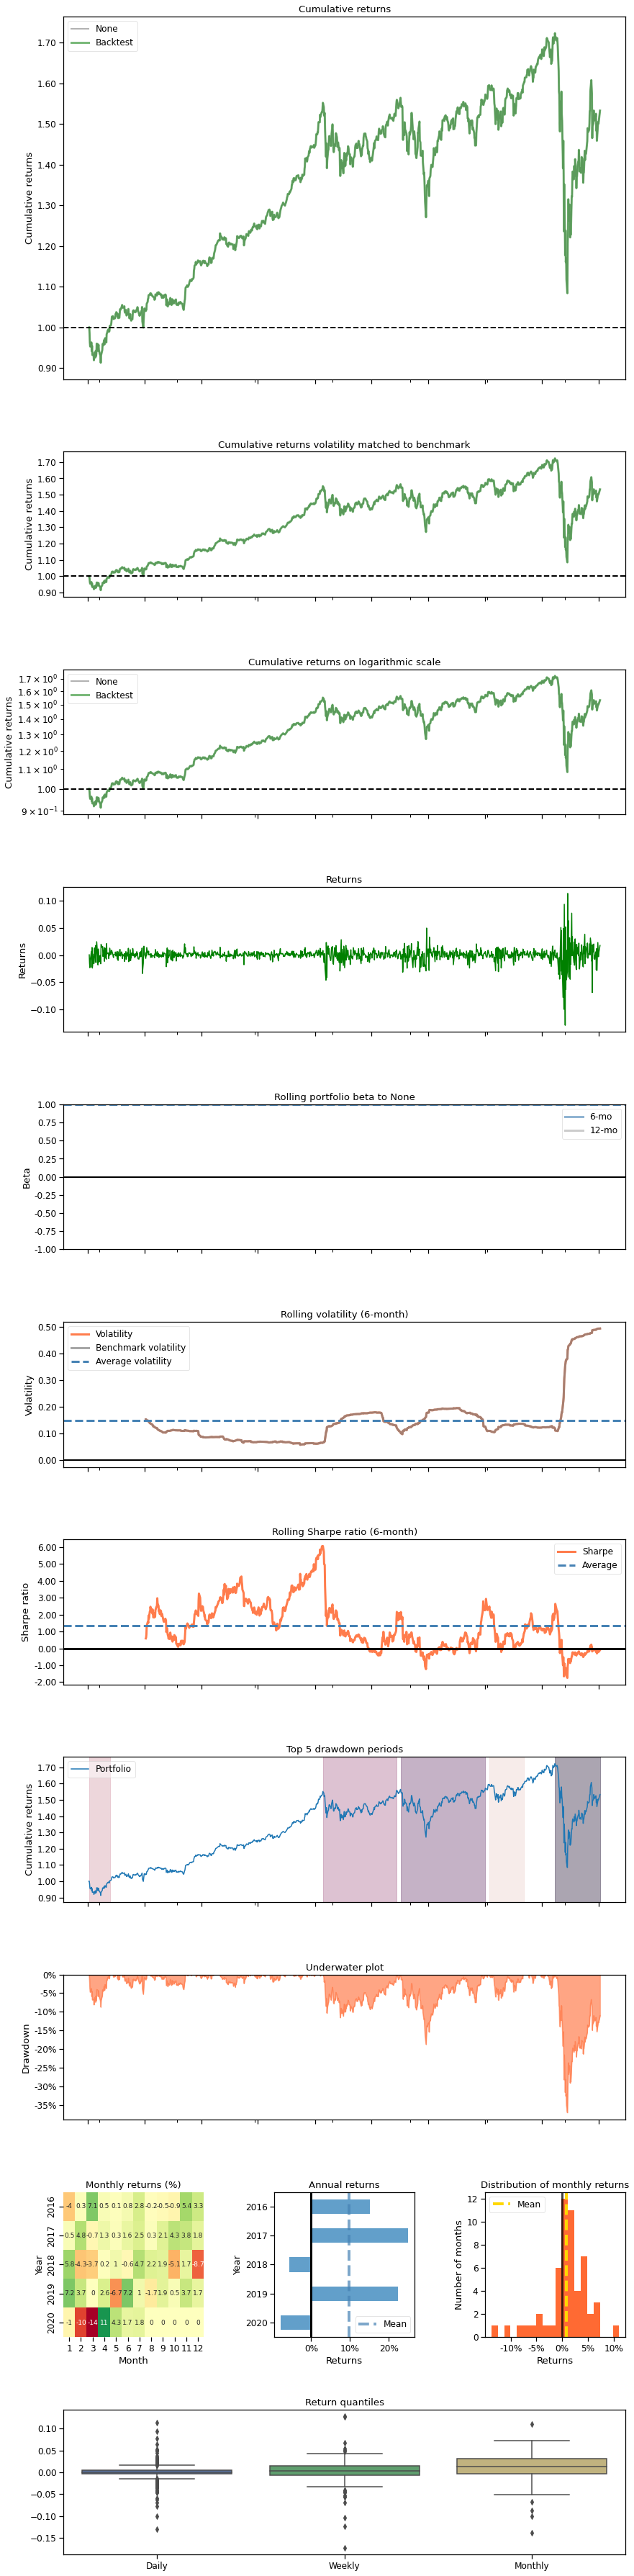

In [48]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dow_strat, benchmark_rets = dow_strat, set_context=False)

### A2C ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [111]:
dji_a2c_ver1_1_account_value = get_account_value(63, 63, 'dji', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 1)
dji_a2c_ver1_2_account_value = get_account_value(63, 63, 'dji', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 2)
dji_a2c_ver1_3_account_value = get_account_value(63, 63, 'dji', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 3)
dji_a2c_ver1_4_account_value = get_account_value(63, 63, 'dji', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 4)
dji_a2c_ver1_5_account_value = get_account_value(63, 63, 'dji', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 5)

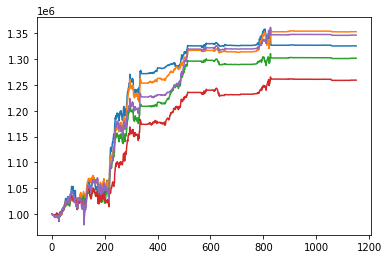

In [112]:
dji_a2c_ver1_1_account_value.account_value.plot()
dji_a2c_ver1_2_account_value.account_value.plot()
dji_a2c_ver1_3_account_value.account_value.plot()
dji_a2c_ver1_4_account_value.account_value.plot()
dji_a2c_ver1_5_account_value.account_value.plot()

In [113]:
dji_a2c_ver1_1_account_value = get_daily_return(dji_a2c_ver1_1_account_value)
dji_a2c_ver1_2_account_value = get_daily_return(dji_a2c_ver1_2_account_value)
dji_a2c_ver1_3_account_value = get_daily_return(dji_a2c_ver1_3_account_value)
dji_a2c_ver1_4_account_value = get_daily_return(dji_a2c_ver1_4_account_value)
dji_a2c_ver1_5_account_value = get_daily_return(dji_a2c_ver1_5_account_value)

In [114]:
dji_a2c_ver1_1_account_value['Date'] = test_dji['Date']
dji_a2c_ver1_2_account_value['Date'] = test_dji['Date']
dji_a2c_ver1_3_account_value['Date'] = test_dji['Date']
dji_a2c_ver1_4_account_value['Date'] = test_dji['Date']
dji_a2c_ver1_5_account_value['Date'] = test_dji['Date']

In [115]:
dji_a2c_ver1_1_strat = backtest_strat(dji_a2c_ver1_1_account_value[:1134])
dji_a2c_ver1_2_strat = backtest_strat(dji_a2c_ver1_2_account_value[:1134])
dji_a2c_ver1_3_strat = backtest_strat(dji_a2c_ver1_3_account_value[:1134])
dji_a2c_ver1_4_strat = backtest_strat(dji_a2c_ver1_4_account_value[:1134])
dji_a2c_ver1_5_strat = backtest_strat(dji_a2c_ver1_5_account_value[:1134])

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


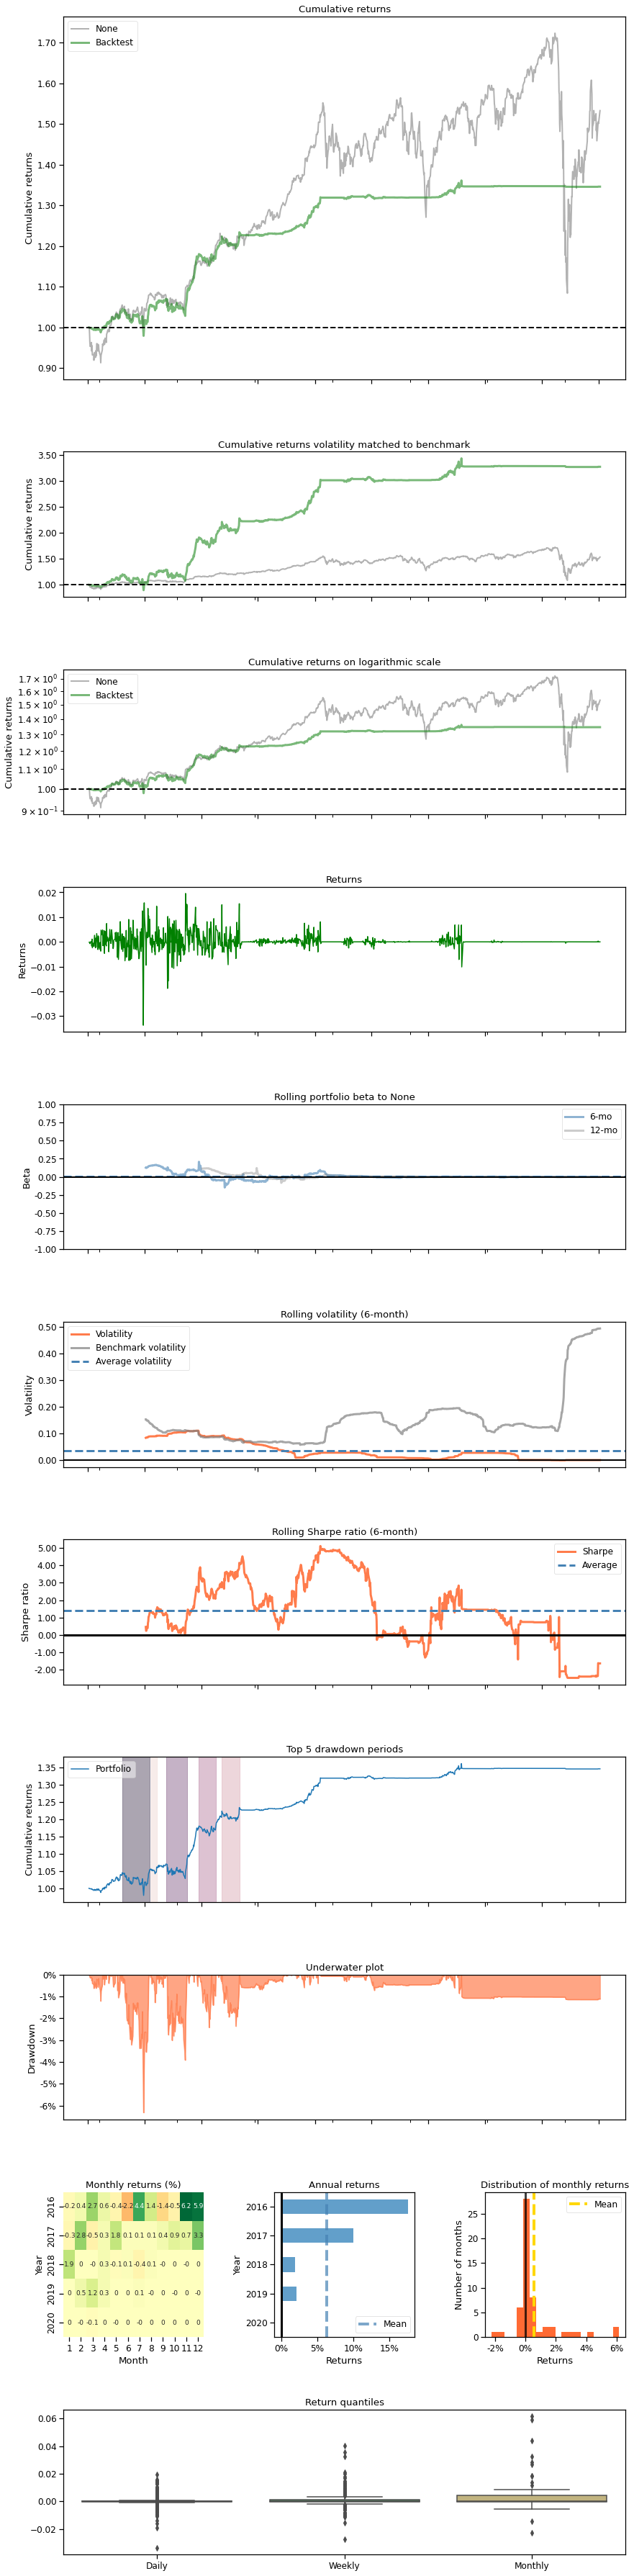

In [116]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_a2c_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [107]:
term = '(2016/01/04-2020/07/06)'
a2c_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_a2c_1':['32.523%','0%','0%','0','-0%'],
                          'dji_a2c_2':['35.266%','0%','0%','0','-0%'],
                          'dji_a2c_3':['30.141%','0%','0%','0','-0%'],
                          'dji_a2c_4':['25.905%','0%','0%','0','-0%'],
                          'dji_a2c_5':['34.604%','0%','0%','0','-0%'],
                          }
a2c_ver1_performance_evaluation = pd.DataFrame(a2c_ver1_performance_evaluation).set_index(term)
a2c_ver1_performance_evaluation.to_csv('performance/dji_a2c_ver1_performance_evaluation_comparison.csv',index=True)
display(a2c_ver1_performance_evaluation)

dji_a2c_1 dji_a2c_2 dji_a2c_3 dji_a2c_4 dji_a2c_5
(2016/01/04-2020/07/06)                                                  
Cumulative Return         32.523%   35.266%   30.141%   25.905%   34.604%
Annual Return                  0%        0%        0%        0%        0%
Annual Volatility              0%        0%        0%        0%        0%
Sharpe Ratio                    0         0         0         0         0
Max Dragdown                  -0%       -0%       -0%       -0%       -0%

In [108]:
a2c_ver1_performance_evaluation_transpose = a2c_ver1_performance_evaluation.T
a2c_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
a2c_ver1_performance_evaluation_transpose = a2c_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(a2c_ver1_performance_evaluation_transpose)
display(a2c_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_a2c_1                           32.523              0                  0   
dji_a2c_2                           35.266              0                  0   
dji_a2c_3                           30.141              0                  0   
dji_a2c_4                           25.905              0                  0   
dji_a2c_5                           34.604              0                  0   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_a2c_1                           0             0  
dji_a2c_2                           0             0  
dji_a2c_3                           0             0  
dji_a2c_4                           0             0  
dji_a2c_5                           0             0

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [109]:
a2c_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

31.687800000000003

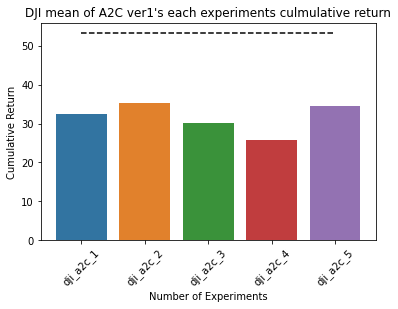

In [110]:
real_dji = 53.287
sns.barplot(y= a2c_ver1_performance_evaluation_transpose['Cumulative Return'], x=a2c_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_dji,x=a2c_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
plt.title("DJI mean of A2C ver1's each experiments culmulative return")
plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.savefig('./performance/dji_a2c_ver1.png',dpi=500)

### DDPG ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [49]:
dji_ddpg_ver1_1_account_value = get_account_value(63, 63, 'dji', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 1)
dji_ddpg_ver1_2_account_value = get_account_value(63, 63, 'dji', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 2)
dji_ddpg_ver1_3_account_value = get_account_value(63, 63, 'dji', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 3)
dji_ddpg_ver1_4_account_value = get_account_value(63, 63, 'dji', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 4)
dji_ddpg_ver1_5_account_value = get_account_value(63, 63, 'dji', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 5)

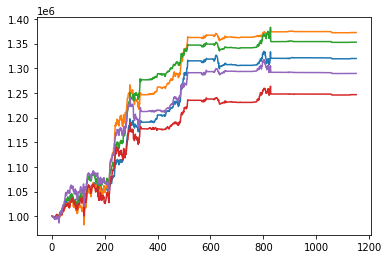

In [50]:
dji_ddpg_ver1_1_account_value.account_value.plot()
dji_ddpg_ver1_2_account_value.account_value.plot()
dji_ddpg_ver1_3_account_value.account_value.plot()
dji_ddpg_ver1_4_account_value.account_value.plot()
dji_ddpg_ver1_5_account_value.account_value.plot()

In [51]:
dji_ddpg_ver1_1_account_value = get_daily_return(dji_ddpg_ver1_1_account_value)
dji_ddpg_ver1_2_account_value = get_daily_return(dji_ddpg_ver1_2_account_value)
dji_ddpg_ver1_3_account_value = get_daily_return(dji_ddpg_ver1_3_account_value)
dji_ddpg_ver1_4_account_value = get_daily_return(dji_ddpg_ver1_4_account_value)
dji_ddpg_ver1_5_account_value = get_daily_return(dji_ddpg_ver1_5_account_value)

In [52]:
dji_ddpg_ver1_1_account_value['Date'] = test_dji['Date']
dji_ddpg_ver1_2_account_value['Date'] = test_dji['Date']
dji_ddpg_ver1_3_account_value['Date'] = test_dji['Date']
dji_ddpg_ver1_4_account_value['Date'] = test_dji['Date']
dji_ddpg_ver1_5_account_value['Date'] = test_dji['Date']

In [58]:
dji_ddpg_ver1_1_strat = backtest_strat(dji_ddpg_ver1_1_account_value[:1134])
dji_ddpg_ver1_2_strat = backtest_strat(dji_ddpg_ver1_2_account_value[:1134])
dji_ddpg_ver1_3_strat = backtest_strat(dji_ddpg_ver1_3_account_value[:1134])
dji_ddpg_ver1_4_strat = backtest_strat(dji_ddpg_ver1_4_account_value[:1134])
dji_ddpg_ver1_5_strat = backtest_strat(dji_ddpg_ver1_5_account_value[:1134])

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


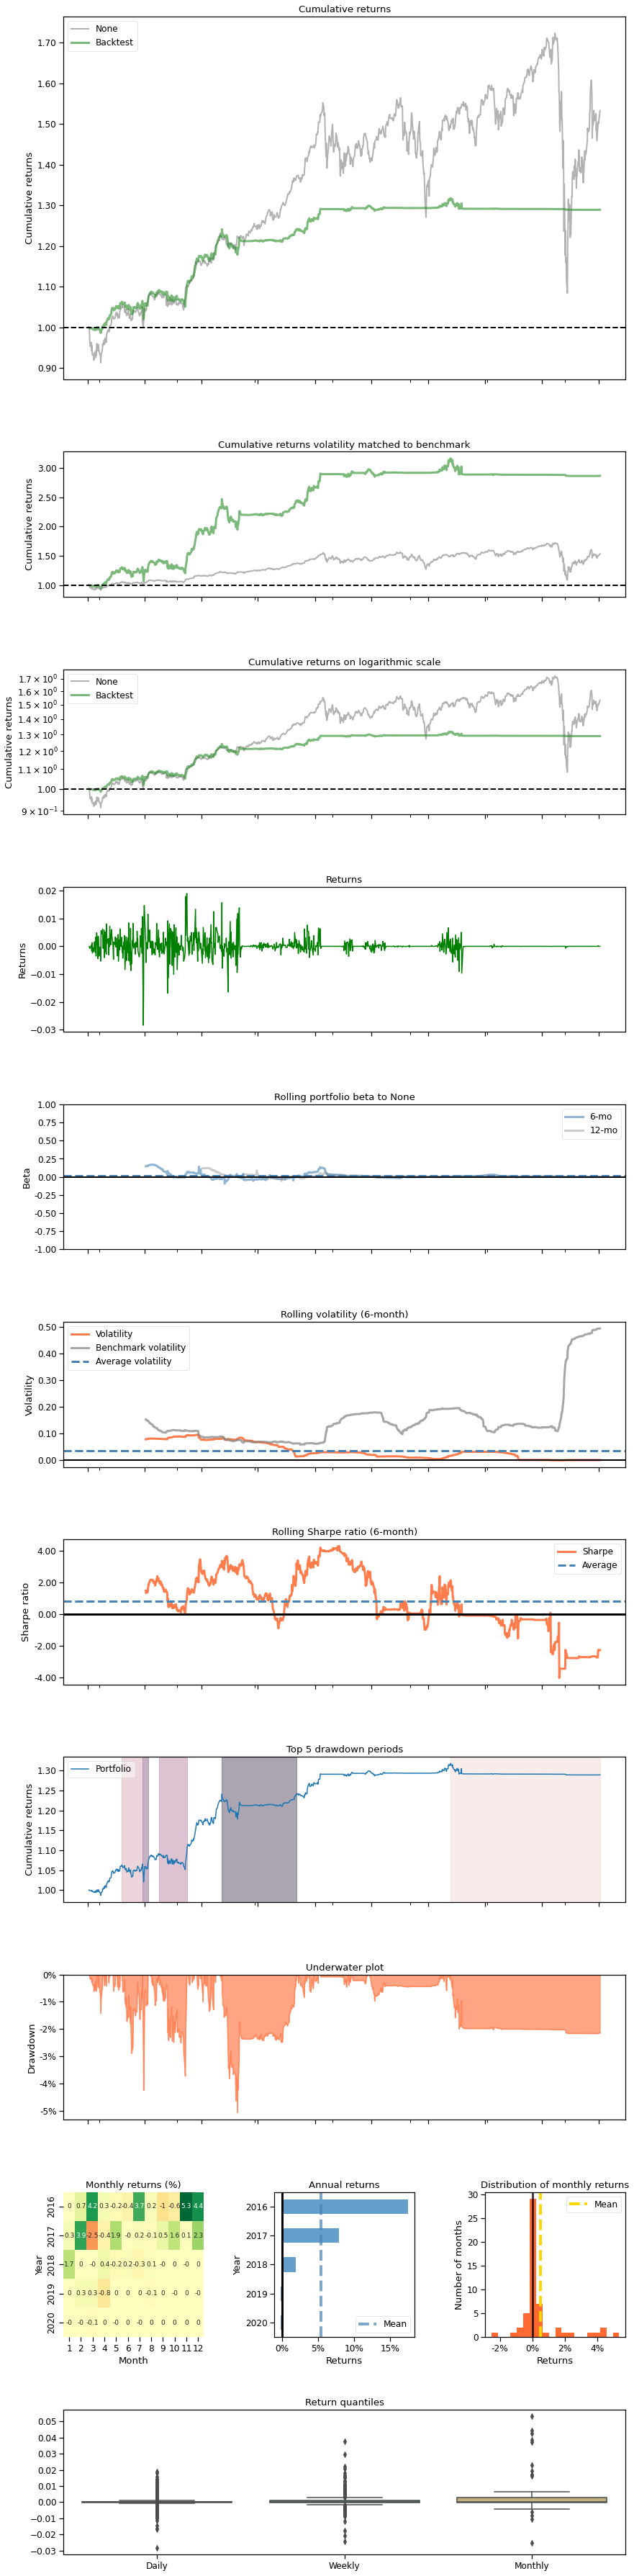

In [65]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ddpg_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [66]:
term = '(2016/01/04-2020/07/06)'
ddpg_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ddpg_1':['31.964%','0%','0%','0','-0%'],
                          'dji_ddpg_2':['37.225%','0%','0%','0','-0%'],
                          'dji_ddpg_3':['35.27%','0%','0%','0','-0%'],
                          'dji_ddpg_4':['24.637%','0%','0%','0','-0%'],
                          'dji_ddpg_5':['28.937%','0%','0%','0','-0%'],
                          }
ddpg_ver1_performance_evaluation = pd.DataFrame(ddpg_ver1_performance_evaluation).set_index(term)
ddpg_ver1_performance_evaluation.to_csv('performance/dji_ddpg_ver1_performance_evaluation_comparison.csv',index=True)
display(ddpg_ver1_performance_evaluation)

dji_ddpg_1 dji_ddpg_2 dji_ddpg_3 dji_ddpg_4 dji_ddpg_5
(2016/01/04-2020/07/06)                                                       
Cumulative Return          31.964%    37.225%     35.27%    24.637%    28.937%
Annual Return                   0%         0%         0%         0%         0%
Annual Volatility               0%         0%         0%         0%         0%
Sharpe Ratio                     0          0          0          0          0
Max Dragdown                   -0%        -0%        -0%        -0%        -0%

In [67]:
ddpg_ver1_performance_evaluation_transpose = ddpg_ver1_performance_evaluation.T
ddpg_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ddpg_ver1_performance_evaluation_transpose = ddpg_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ddpg_ver1_performance_evaluation_transpose)
display(ddpg_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ddpg_1                          31.964              0                  0   
dji_ddpg_2                          37.225              0                  0   
dji_ddpg_3                          35.270              0                  0   
dji_ddpg_4                          24.637              0                  0   
dji_ddpg_5                          28.937              0                  0   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ddpg_1                          0             0  
dji_ddpg_2                          0             0  
dji_ddpg_3                          0             0  
dji_ddpg_4                          0             0  
dji_ddpg_5                          0             0

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [68]:
ddpg_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

31.606600000000004

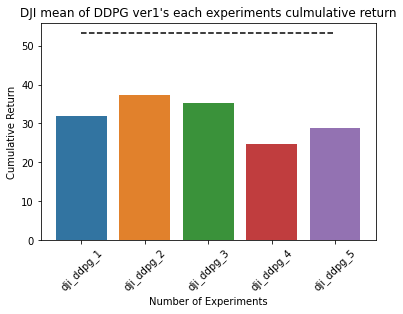

In [69]:
real_dji = 53.287
sns.barplot(y= ddpg_ver1_performance_evaluation_transpose['Cumulative Return'], x=ddpg_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_dji,x=ddpg_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
plt.title("DJI mean of DDPG ver1's each experiments culmulative return")
plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.savefig('./performance/dji_ddpg_ver1.png',dpi=500)

### PPO ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [71]:
dji_ppo_ver1_1_account_value = get_account_value(63, 63, 'dji', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 1)
dji_ppo_ver1_2_account_value = get_account_value(63, 63, 'dji', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 2)
dji_ppo_ver1_3_account_value = get_account_value(63, 63, 'dji', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 3)
dji_ppo_ver1_4_account_value = get_account_value(63, 63, 'dji', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 4)
dji_ppo_ver1_5_account_value = get_account_value(63, 63, 'dji', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 5)

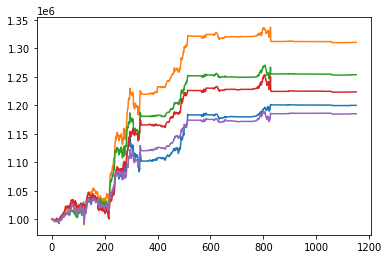

In [72]:
dji_ppo_ver1_1_account_value.account_value.plot()
dji_ppo_ver1_2_account_value.account_value.plot()
dji_ppo_ver1_3_account_value.account_value.plot()
dji_ppo_ver1_4_account_value.account_value.plot()
dji_ppo_ver1_5_account_value.account_value.plot()

In [84]:
dji_ppo_ver1_1_account_value = get_daily_return(dji_ppo_ver1_1_account_value)
dji_ppo_ver1_2_account_value = get_daily_return(dji_ppo_ver1_2_account_value)
dji_ppo_ver1_3_account_value = get_daily_return(dji_ppo_ver1_3_account_value)
dji_ppo_ver1_4_account_value = get_daily_return(dji_ppo_ver1_4_account_value)
dji_ppo_ver1_5_account_value = get_daily_return(dji_ppo_ver1_5_account_value)

In [85]:
dji_ppo_ver1_1_account_value['Date'] = test_dji['Date']
dji_ppo_ver1_2_account_value['Date'] = test_dji['Date']
dji_ppo_ver1_3_account_value['Date'] = test_dji['Date']
dji_ppo_ver1_4_account_value['Date'] = test_dji['Date']
dji_ppo_ver1_5_account_value['Date'] = test_dji['Date']

In [86]:
dji_ppo_ver1_1_strat = backtest_strat(dji_ppo_ver1_1_account_value[:1134])
dji_ppo_ver1_2_strat = backtest_strat(dji_ppo_ver1_2_account_value[:1134])
dji_ppo_ver1_3_strat = backtest_strat(dji_ppo_ver1_3_account_value[:1134])
dji_ppo_ver1_4_strat = backtest_strat(dji_ppo_ver1_4_account_value[:1134])
dji_ppo_ver1_5_strat = backtest_strat(dji_ppo_ver1_5_account_value[:1134])

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


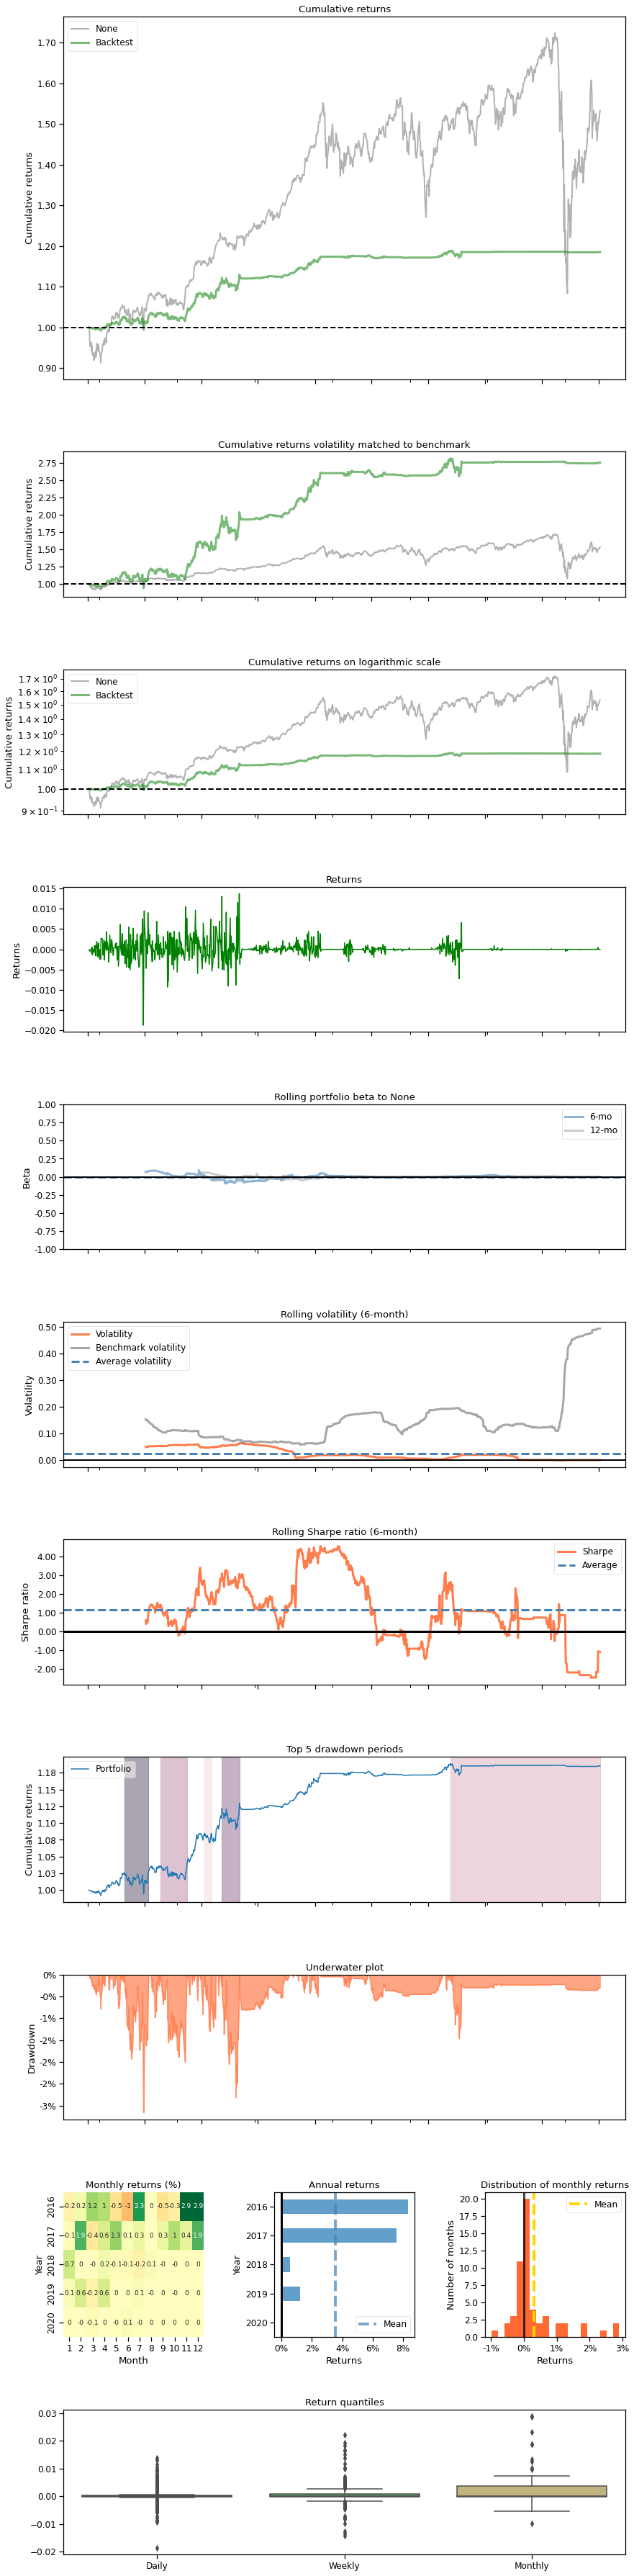

In [91]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ppo_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [92]:
term = '(2016/01/04-2020/07/06)'
ppo_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ppo_1':['19.995%','0%','0%','0','-0%'],
                          'dji_ppo_2':['31.06%','0%','0%','0','-0%'],
                          'dji_ppo_3':['25.378%','0%','0%','0','-0%'],
                          'dji_ppo_4':['22.356%','0%','0%','0','-0%'],
                          'dji_ppo_5':['18.523%','0%','0%','0','-0%'],
                          }
ppo_ver1_performance_evaluation = pd.DataFrame(ppo_ver1_performance_evaluation).set_index(term)
ppo_ver1_performance_evaluation.to_csv('performance/dji_ppo_ver1_performance_evaluation_comparison.csv',index=True)
display(ppo_ver1_performance_evaluation)

dji_ppo_1 dji_ppo_2 dji_ppo_3 dji_ppo_4 dji_ppo_5
(2016/01/04-2020/07/06)                                                  
Cumulative Return         19.995%    31.06%   25.378%   22.356%   18.523%
Annual Return                  0%        0%        0%        0%        0%
Annual Volatility              0%        0%        0%        0%        0%
Sharpe Ratio                    0         0         0         0         0
Max Dragdown                  -0%       -0%       -0%       -0%       -0%

In [93]:
ppo_ver1_performance_evaluation_transpose = ppo_ver1_performance_evaluation.T
ppo_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ppo_ver1_performance_evaluation_transpose = ppo_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ppo_ver1_performance_evaluation_transpose)
display(ppo_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ppo_1                           19.995              0                  0   
dji_ppo_2                           31.060              0                  0   
dji_ppo_3                           25.378              0                  0   
dji_ppo_4                           22.356              0                  0   
dji_ppo_5                           18.523              0                  0   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ppo_1                           0             0  
dji_ppo_2                           0             0  
dji_ppo_3                           0             0  
dji_ppo_4                           0             0  
dji_ppo_5                           0             0

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [94]:
ppo_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

23.462399999999995

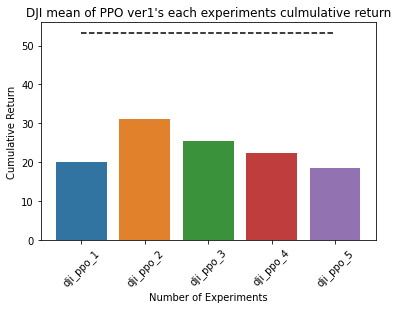

In [95]:
real_dji = 53.287
sns.barplot(y= ppo_ver1_performance_evaluation_transpose['Cumulative Return'], x=ppo_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_dji,x=ppo_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
plt.title("DJI mean of PPO ver1's each experiments culmulative return")
plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.savefig('./performance/dji_ppo_ver1.png',dpi=500)

### Ensemble ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [73]:
dji_ensemble_ver1_1_account_value = get_account_value(63, 63, 'dji', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 1)
dji_ensemble_ver1_2_account_value = get_account_value(63, 63, 'dji', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 2)
dji_ensemble_ver1_3_account_value = get_account_value(63, 63, 'dji', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 3)
dji_ensemble_ver1_4_account_value = get_account_value(63, 63, 'dji', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 4)
dji_ensemble_ver1_5_account_value = get_account_value(63, 63, 'dji', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 5)

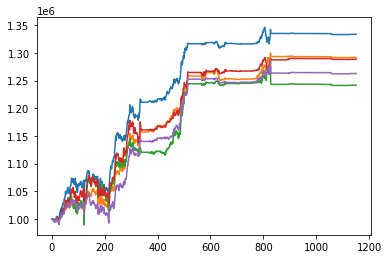

In [75]:
dji_ensemble_ver1_1_account_value.account_value.plot()
dji_ensemble_ver1_2_account_value.account_value.plot()
dji_ensemble_ver1_3_account_value.account_value.plot()
dji_ensemble_ver1_4_account_value.account_value.plot()
dji_ensemble_ver1_5_account_value.account_value.plot()

In [117]:
dji_ensemble_ver1_1_account_value = get_daily_return(dji_ensemble_ver1_1_account_value)
dji_ensemble_ver1_2_account_value = get_daily_return(dji_ensemble_ver1_2_account_value)
dji_ensemble_ver1_3_account_value = get_daily_return(dji_ensemble_ver1_3_account_value)
dji_ensemble_ver1_4_account_value = get_daily_return(dji_ensemble_ver1_4_account_value)
dji_ensemble_ver1_5_account_value = get_daily_return(dji_ensemble_ver1_5_account_value)

In [118]:
dji_ensemble_ver1_1_account_value['Date'] = test_dji['Date']
dji_ensemble_ver1_2_account_value['Date'] = test_dji['Date']
dji_ensemble_ver1_3_account_value['Date'] = test_dji['Date']
dji_ensemble_ver1_4_account_value['Date'] = test_dji['Date']
dji_ensemble_ver1_5_account_value['Date'] = test_dji['Date']

In [119]:
dji_ensemble_ver1_1_strat = backtest_strat(dji_ensemble_ver1_1_account_value[:1134])
dji_ensemble_ver1_2_strat = backtest_strat(dji_ensemble_ver1_2_account_value[:1134])
dji_ensemble_ver1_3_strat = backtest_strat(dji_ensemble_ver1_3_account_value[:1134])
dji_ensemble_ver1_4_strat = backtest_strat(dji_ensemble_ver1_4_account_value[:1134])
dji_ensemble_ver1_5_strat = backtest_strat(dji_ensemble_ver1_5_account_value[:1134])

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


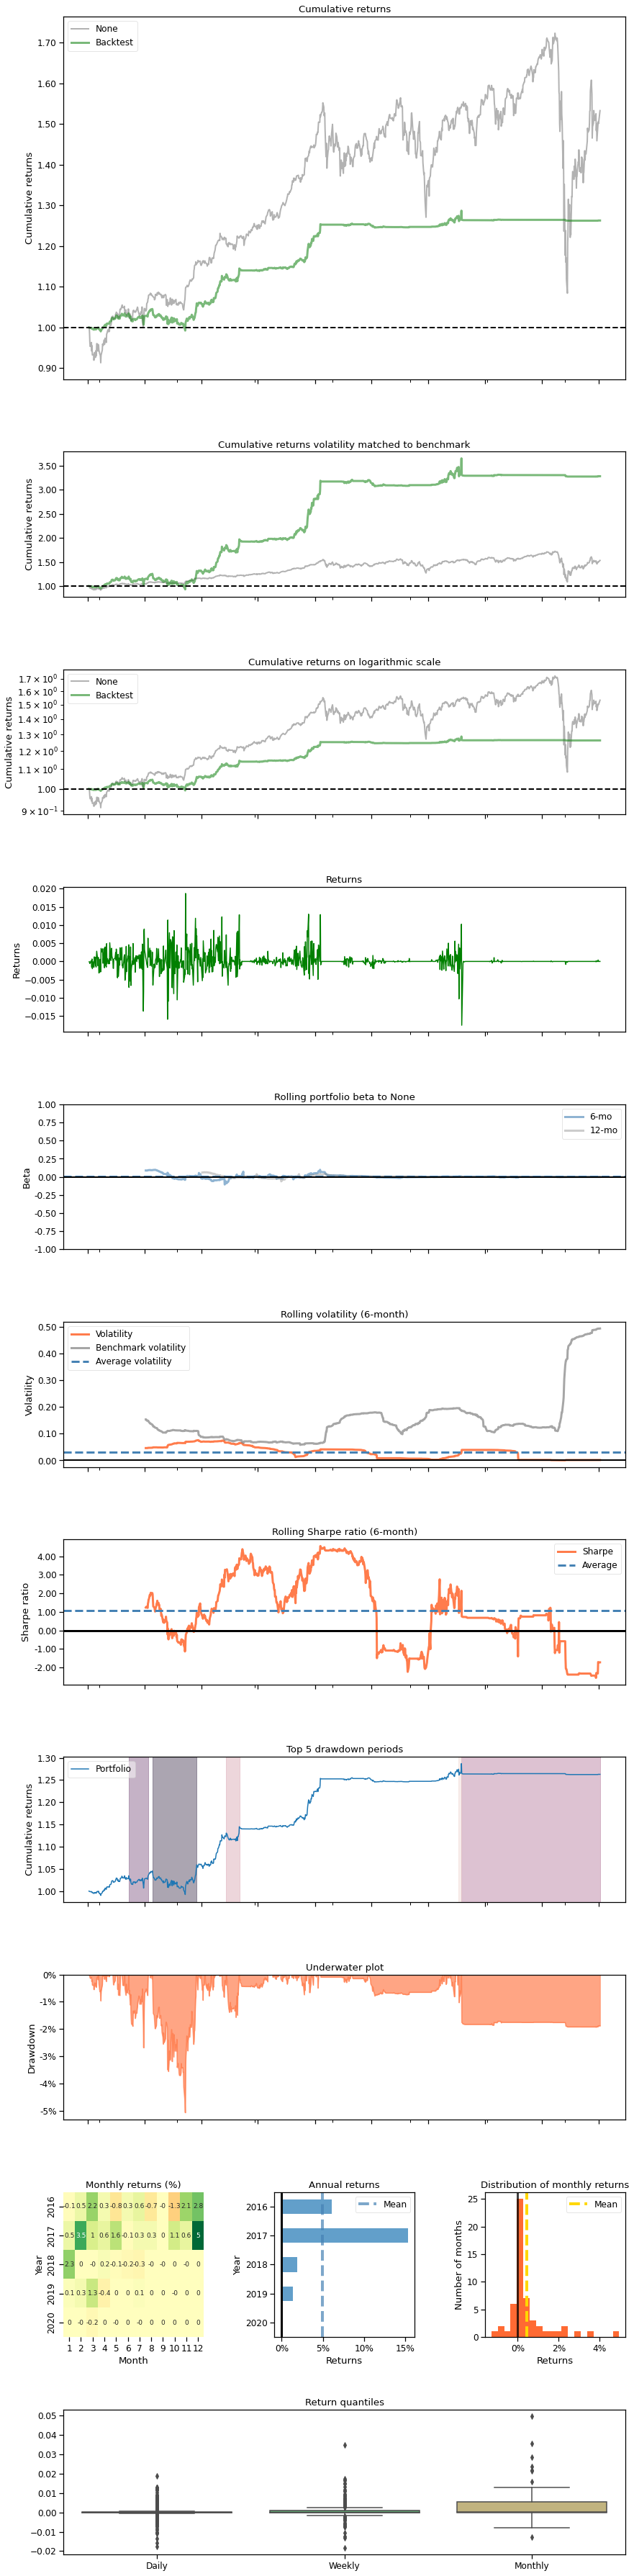

In [125]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ensemble_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [126]:
term = '(2016/01/04-2020/07/06)'
ensemble_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ensemble_1':['33.369%','0%','0%','0','-0%'],
                          'dji_ensemble_2':['29.186%','0%','0%','0','-0%'],
                          'dji_ensemble_3':['24.174%','0%','0%','0','-0%'],
                          'dji_ensemble_4':['28.856%','0%','0%','0','-0%'],
                          'dji_ensemble_5':['26.281%','0%','0%','0','-0%'],
                          }
ensemble_ver1_performance_evaluation = pd.DataFrame(ensemble_ver1_performance_evaluation).set_index(term)
ensemble_ver1_performance_evaluation.to_csv('performance/dji_ensemble_ver1_performance_evaluation_comparison.csv',index=True)
display(ensemble_ver1_performance_evaluation)

dji_ensemble_1 dji_ensemble_2 dji_ensemble_3  \
(2016/01/04-2020/07/06)                                                
Cumulative Return              33.369%        29.186%        24.174%   
Annual Return                       0%             0%             0%   
Annual Volatility                   0%             0%             0%   
Sharpe Ratio                         0              0              0   
Max Dragdown                       -0%            -0%            -0%   

                        dji_ensemble_4 dji_ensemble_5  
(2016/01/04-2020/07/06)                                
Cumulative Return              28.856%        26.281%  
Annual Return                       0%             0%  
Annual Volatility                   0%             0%  
Sharpe Ratio                         0              0  
Max Dragdown                       -0%            -0%

In [127]:
ensemble_ver1_performance_evaluation_transpose = ensemble_ver1_performance_evaluation.T
ensemble_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ensemble_ver1_performance_evaluation_transpose = ensemble_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ensemble_ver1_performance_evaluation_transpose)
display(ensemble_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ensemble_1                      33.369              0                  0   
dji_ensemble_2                      29.186              0                  0   
dji_ensemble_3                      24.174              0                  0   
dji_ensemble_4                      28.856              0                  0   
dji_ensemble_5                      26.281              0                  0   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ensemble_1                      0             0  
dji_ensemble_2                      0             0  
dji_ensemble_3                      0             0  
dji_ensemble_4                      0             0  
dji_ensemble_5                      0             0

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [129]:
ensemble_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

28.373199999999997

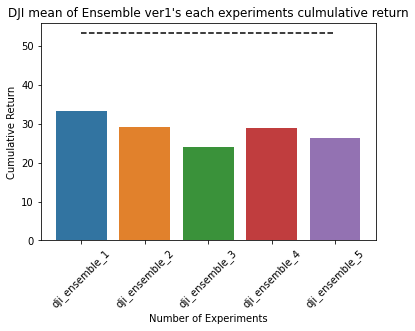

In [130]:
real_dji = 53.287
sns.barplot(y= ensemble_ver1_performance_evaluation_transpose['Cumulative Return'], x=ensemble_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_dji,x=ensemble_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
plt.title("DJI mean of Ensemble ver1's each experiments culmulative return")
plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.savefig('./performance/dji_ensemble_ver1.png',dpi=500)

### Remake Ensemble ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [143]:
dji_remake_ver1_1_account_value = get_account_value(63, 63, 'dji', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 1)
dji_remake_ver1_2_account_value = get_account_value(63, 63, 'dji', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 2)
dji_remake_ver1_3_account_value = get_account_value(63, 63, 'dji', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 3)
dji_remake_ver1_4_account_value = get_account_value(63, 63, 'dji', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 4)
dji_remake_ver1_5_account_value = get_account_value(63, 63, 'dji', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 5)

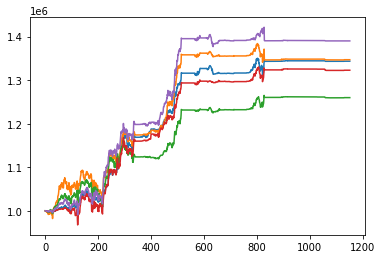

In [144]:
dji_remake_ver1_1_account_value.account_value.plot()
dji_remake_ver1_2_account_value.account_value.plot()
dji_remake_ver1_3_account_value.account_value.plot()
dji_remake_ver1_4_account_value.account_value.plot()
dji_remake_ver1_5_account_value.account_value.plot()

In [145]:
dji_remake_ver1_1_account_value = get_daily_return(dji_remake_ver1_1_account_value)
dji_remake_ver1_2_account_value = get_daily_return(dji_remake_ver1_2_account_value)
dji_remake_ver1_3_account_value = get_daily_return(dji_remake_ver1_3_account_value)
dji_remake_ver1_4_account_value = get_daily_return(dji_remake_ver1_4_account_value)
dji_remake_ver1_5_account_value = get_daily_return(dji_remake_ver1_5_account_value)

In [146]:
dji_remake_ver1_1_account_value['Date'] = test_dji['Date']
dji_remake_ver1_2_account_value['Date'] = test_dji['Date']
dji_remake_ver1_3_account_value['Date'] = test_dji['Date']
dji_remake_ver1_4_account_value['Date'] = test_dji['Date']
dji_remake_ver1_5_account_value['Date'] = test_dji['Date']

In [147]:
dji_remake_ver1_1_strat = backtest_strat(dji_remake_ver1_1_account_value[:1134])
dji_remake_ver1_2_strat = backtest_strat(dji_remake_ver1_2_account_value[:1134])
dji_remake_ver1_3_strat = backtest_strat(dji_remake_ver1_3_account_value[:1134])
dji_remake_ver1_4_strat = backtest_strat(dji_remake_ver1_4_account_value[:1134])
dji_remake_ver1_5_strat = backtest_strat(dji_remake_ver1_5_account_value[:1134])

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


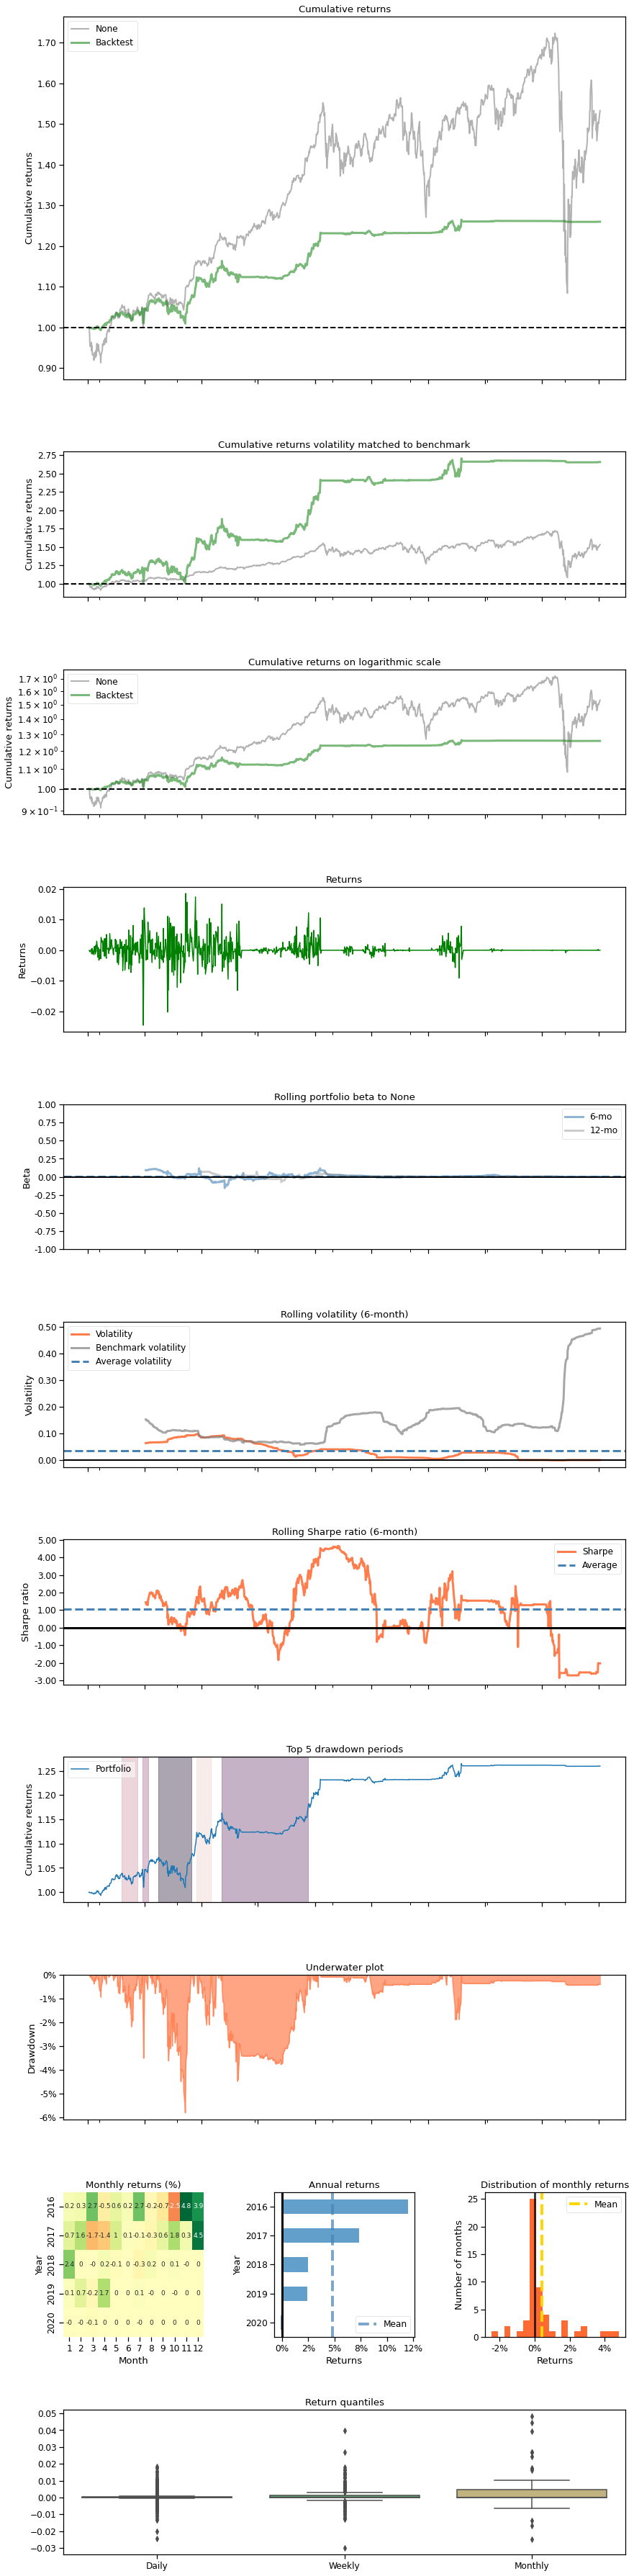

In [148]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_remake_ver1_3_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [149]:
term = '(2016/01/04-2020/07/06)'
remake_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_remake_1':['34.353%','0%','0%','0','-0%'],
                          'dji_remake_2':['34.696%','0%','0%','0','-0%'],
                          'dji_remake_3':['25.987%','0%','0%','0','-0%'],
                          'dji_remake_4':['32.28%','0%','0%','0','-0%'],
                          'dji_remake_5':['39.01%','0%','0%','0','-0%'],
                          }
remake_ver1_performance_evaluation = pd.DataFrame(remake_ver1_performance_evaluation).set_index(term)
remake_ver1_performance_evaluation.to_csv('performance/dji_remake_ver1_performance_evaluation_comparison.csv',index=True)
display(remake_ver1_performance_evaluation)

dji_remake_1 dji_remake_2 dji_remake_3 dji_remake_4  \
(2016/01/04-2020/07/06)                                                       
Cumulative Return            34.353%      34.696%      25.987%       32.28%   
Annual Return                     0%           0%           0%           0%   
Annual Volatility                 0%           0%           0%           0%   
Sharpe Ratio                       0            0            0            0   
Max Dragdown                     -0%          -0%          -0%          -0%   

                        dji_remake_5  
(2016/01/04-2020/07/06)               
Cumulative Return             39.01%  
Annual Return                     0%  
Annual Volatility                 0%  
Sharpe Ratio                       0  
Max Dragdown                     -0%

In [150]:
remake_ver1_performance_evaluation_transpose = remake_ver1_performance_evaluation.T
remake_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
remake_ver1_performance_evaluation_transpose = remake_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(remake_ver1_performance_evaluation_transpose)
display(remake_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_remake_1                        34.353              0                  0   
dji_remake_2                        34.696              0                  0   
dji_remake_3                        25.987              0                  0   
dji_remake_4                        32.280              0                  0   
dji_remake_5                        39.010              0                  0   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_remake_1                        0             0  
dji_remake_2                        0             0  
dji_remake_3                        0             0  
dji_remake_4                        0             0  
dji_remake_5                        0             0

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [151]:
remake_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

33.2652

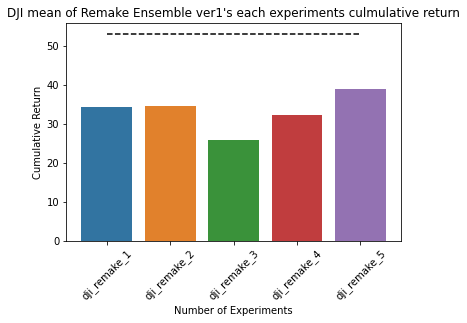

In [152]:
real_dji = 53.287
sns.barplot(y= remake_ver1_performance_evaluation_transpose['Cumulative Return'], x=remake_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_dji,x=remake_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
plt.title("DJI mean of Remake Ensemble ver1's each experiments culmulative return")
plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.savefig('./performance/dji_remake_ver1.png',dpi=500)

## Ensemble

In [13]:
dji_ensemble_1_account_value = get_account_value(63, 63, 'dji', 'ensemble', 'ensemble', 1)
dji_ensemble_2_account_value = get_account_value(63, 63, 'dji', 'ensemble', 'ensemble', 2)
dji_ensemble_3_account_value = get_account_value(63, 63, 'dji', 'ensemble', 'ensemble', 3)
dji_ensemble_4_account_value = get_account_value(63, 63, 'dji', 'ensemble', 'ensemble', 4)
dji_ensemble_5_account_value = get_account_value(63, 63, 'dji', 'ensemble', 'ensemble', 5)
dji_ensemble_5_account_value

account_value  datadate
0      1.000000e+06  20160104
1      9.998228e+05  20160105
2      9.966412e+05  20160106
3      9.908113e+05  20160107
4      9.882848e+05  20160108
...             ...       ...
1129   1.442704e+06  20200629
1130   1.442704e+06  20200630
1131   1.442704e+06  20200701
1132   1.442704e+06  20200702
1133   1.442704e+06  20200706

[1134 rows x 2 columns]

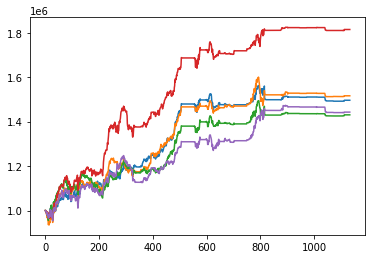

In [14]:
dji_ensemble_1_account_value.account_value.plot()
dji_ensemble_2_account_value.account_value.plot()
dji_ensemble_3_account_value.account_value.plot()
dji_ensemble_4_account_value.account_value.plot()
dji_ensemble_5_account_value.account_value.plot()

In [15]:
dji_ensemble_1_account_value = get_daily_return(dji_ensemble_1_account_value)
dji_ensemble_2_account_value = get_daily_return(dji_ensemble_2_account_value)
dji_ensemble_3_account_value = get_daily_return(dji_ensemble_3_account_value)
dji_ensemble_4_account_value = get_daily_return(dji_ensemble_4_account_value)
dji_ensemble_5_account_value = get_daily_return(dji_ensemble_5_account_value)

In [16]:
dji_ensemble_1_account_value['Date'] = test_dji['Date']
dji_ensemble_2_account_value['Date'] = test_dji['Date']
dji_ensemble_3_account_value['Date'] = test_dji['Date']
dji_ensemble_4_account_value['Date'] = test_dji['Date']
dji_ensemble_5_account_value['Date'] = test_dji['Date']
#display(dji_ensemble_1_account_value)

In [17]:
dji_ensemble_1_strat = backtest_strat(dji_ensemble_1_account_value)
dji_ensemble_2_strat = backtest_strat(dji_ensemble_2_account_value)
dji_ensemble_3_strat = backtest_strat(dji_ensemble_3_account_value)
dji_ensemble_4_strat = backtest_strat(dji_ensemble_4_account_value)
dji_ensemble_5_strat = backtest_strat(dji_ensemble_5_account_value)
#display(pd.DataFrame(dji_ensemble_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


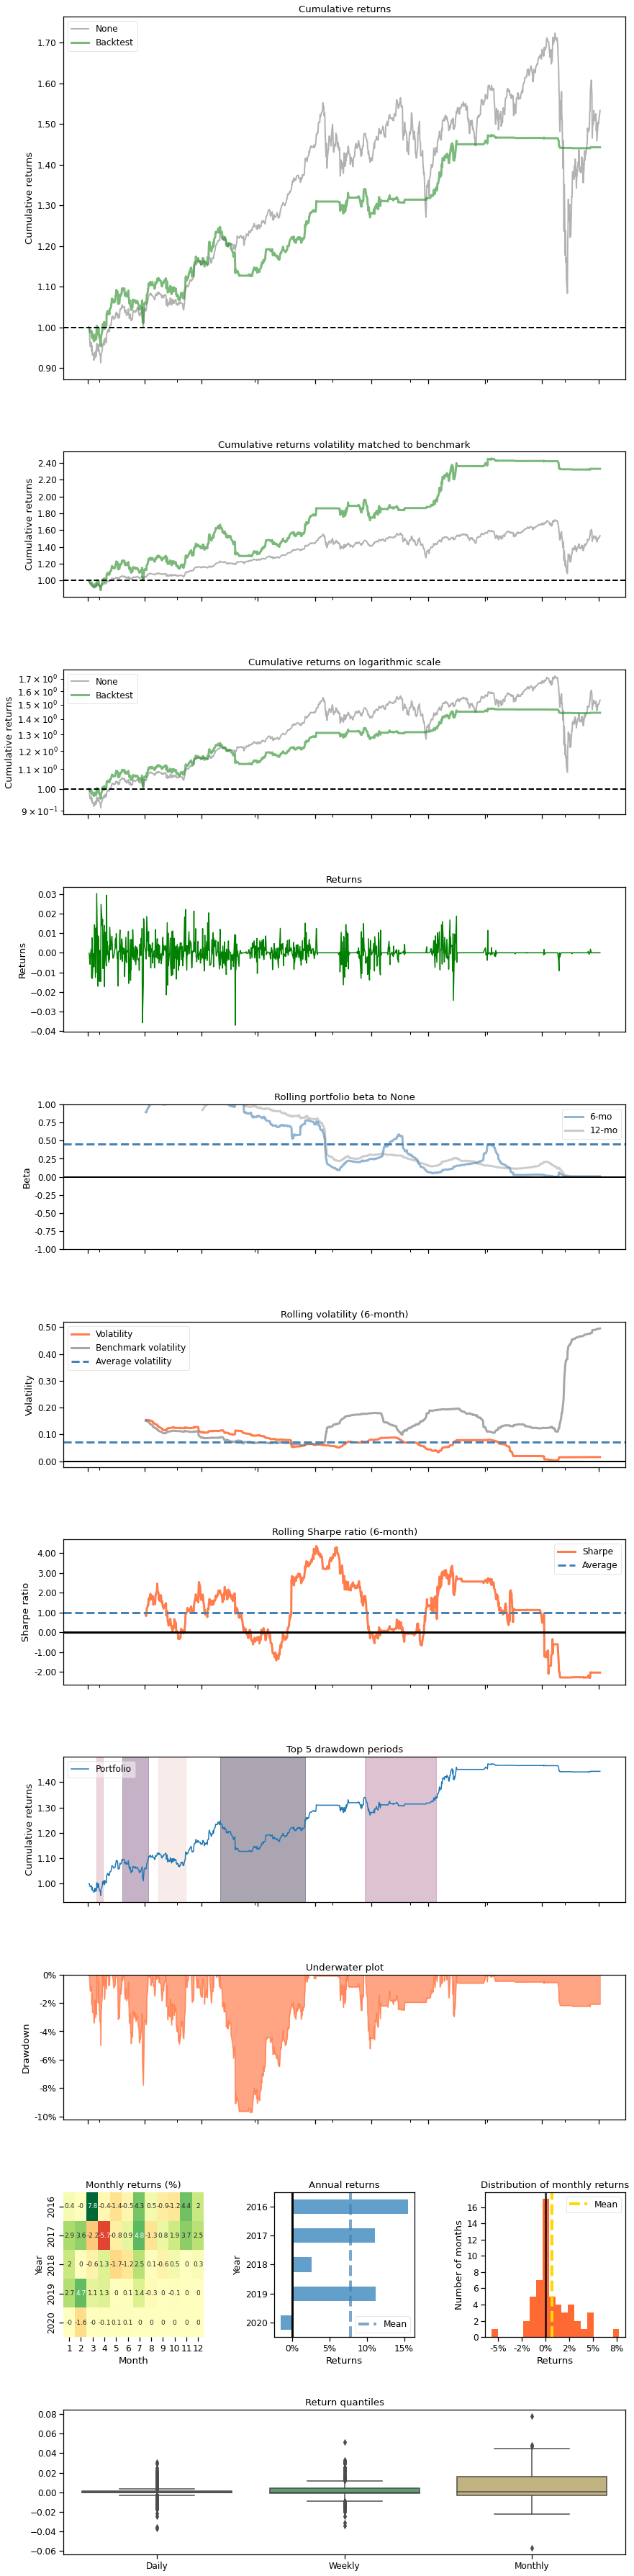

In [18]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ensemble_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [19]:
term = '(2016/01/04-2020/07/06)'
ensemble_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ensemble_1':['49.604%','9.364%','7.941%','1.17','-5.391%'],
                          'dji_ensemble_2':['51.61%','9.689%','7.666%','1.25','-7.987%'],
                          'dji_ensemble_3':['43.041%','8.28%','7.764%','1.06','-9.476%'],
                          'dji_ensemble_4':['81.434%','14.154%','8.598%','1.58','-9.487%'],
                          'dji_ensemble_5':['44.27%','8.486%','8.336%','1.02','-9.723%'],
                          }
ensemble_performance_evaluation = pd.DataFrame(ensemble_performance_evaluation).set_index(term)
ensemble_performance_evaluation.to_csv('performance/dji_ensemble_performance_evaluation_comparison.csv',index=True)
display(ensemble_performance_evaluation)

dji_ensemble_1 dji_ensemble_2 dji_ensemble_3  \
(2016/01/04-2020/07/06)                                                
Cumulative Return              49.604%         51.61%        43.041%   
Annual Return                   9.364%         9.689%          8.28%   
Annual Volatility               7.941%         7.666%         7.764%   
Sharpe Ratio                      1.17           1.25           1.06   
Max Dragdown                   -5.391%        -7.987%        -9.476%   

                        dji_ensemble_4 dji_ensemble_5  
(2016/01/04-2020/07/06)                                
Cumulative Return              81.434%         44.27%  
Annual Return                  14.154%         8.486%  
Annual Volatility               8.598%         8.336%  
Sharpe Ratio                      1.58           1.02  
Max Dragdown                   -9.487%        -9.723%

In [20]:
ensemble_performance_evaluation_transpose = ensemble_performance_evaluation.T
ensemble_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ensemble_performance_evaluation_transpose = ensemble_performance_evaluation_transpose.apply(pd.to_numeric)
display(ensemble_performance_evaluation_transpose)
display(ensemble_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ensemble_1                      49.604          9.364              7.941   
dji_ensemble_2                      51.610          9.689              7.666   
dji_ensemble_3                      43.041          8.280              7.764   
dji_ensemble_4                      81.434         14.154              8.598   
dji_ensemble_5                      44.270          8.486              8.336   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ensemble_1                   1.17        -5.391  
dji_ensemble_2                   1.25        -7.987  
dji_ensemble_3                   1.06        -9.476  
dji_ensemble_4                   1.58        -9.487  
dji_ensemble_5                   1.02        -9.723

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [21]:
ensemble_performance_evaluation_transpose['Cumulative Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Volatility'].mean()
#ensemble_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ensemble_performance_evaluation_transpose['Max Dragdown'].mean()

53.9918

## PPO

In [22]:
dji_ppo_1_account_value = get_account_value(63, 63, 'dji', 'ppo','PPO', 1)
dji_ppo_2_account_value = get_account_value(63, 63, 'dji', 'ppo','PPO', 2)
dji_ppo_3_account_value = get_account_value(63, 63, 'dji', 'ppo','PPO', 3)
dji_ppo_4_account_value = get_account_value(63, 63, 'dji', 'ppo','PPO', 4)
dji_ppo_5_account_value = get_account_value(63, 63, 'dji', 'ppo','PPO', 5)
display(dji_ppo_1_account_value)

account_value  datadate
0      1.000000e+06  20160104
1      9.992990e+05  20160105
2      9.969762e+05  20160106
3      9.922958e+05  20160107
4      9.900024e+05  20160108
...             ...       ...
1129   1.444449e+06  20200629
1130   1.444449e+06  20200630
1131   1.444449e+06  20200701
1132   1.444449e+06  20200702
1133   1.444449e+06  20200706

[1134 rows x 2 columns]

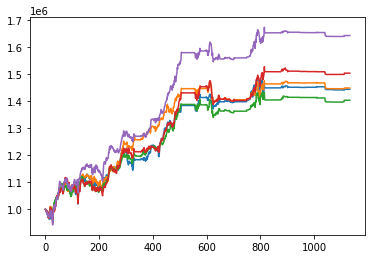

In [23]:
dji_ppo_1_account_value.account_value.plot()
dji_ppo_2_account_value.account_value.plot()
dji_ppo_3_account_value.account_value.plot()
dji_ppo_4_account_value.account_value.plot()
dji_ppo_5_account_value.account_value.plot()

In [24]:
dji_ppo_1_account_value = get_daily_return(dji_ppo_1_account_value)
dji_ppo_2_account_value = get_daily_return(dji_ppo_2_account_value)
dji_ppo_3_account_value = get_daily_return(dji_ppo_3_account_value)
dji_ppo_4_account_value = get_daily_return(dji_ppo_4_account_value)
dji_ppo_5_account_value = get_daily_return(dji_ppo_5_account_value)

In [25]:
dji_ppo_1_account_value['Date'] = test_dji['Date']
dji_ppo_2_account_value['Date'] = test_dji['Date']
dji_ppo_3_account_value['Date'] = test_dji['Date']
dji_ppo_4_account_value['Date'] = test_dji['Date']
dji_ppo_5_account_value['Date'] = test_dji['Date']

In [26]:
dji_ppo_1_strat = backtest_strat(dji_ppo_1_account_value)
dji_ppo_2_strat = backtest_strat(dji_ppo_2_account_value)
dji_ppo_3_strat = backtest_strat(dji_ppo_3_account_value)
dji_ppo_4_strat = backtest_strat(dji_ppo_4_account_value)
dji_ppo_5_strat = backtest_strat(dji_ppo_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


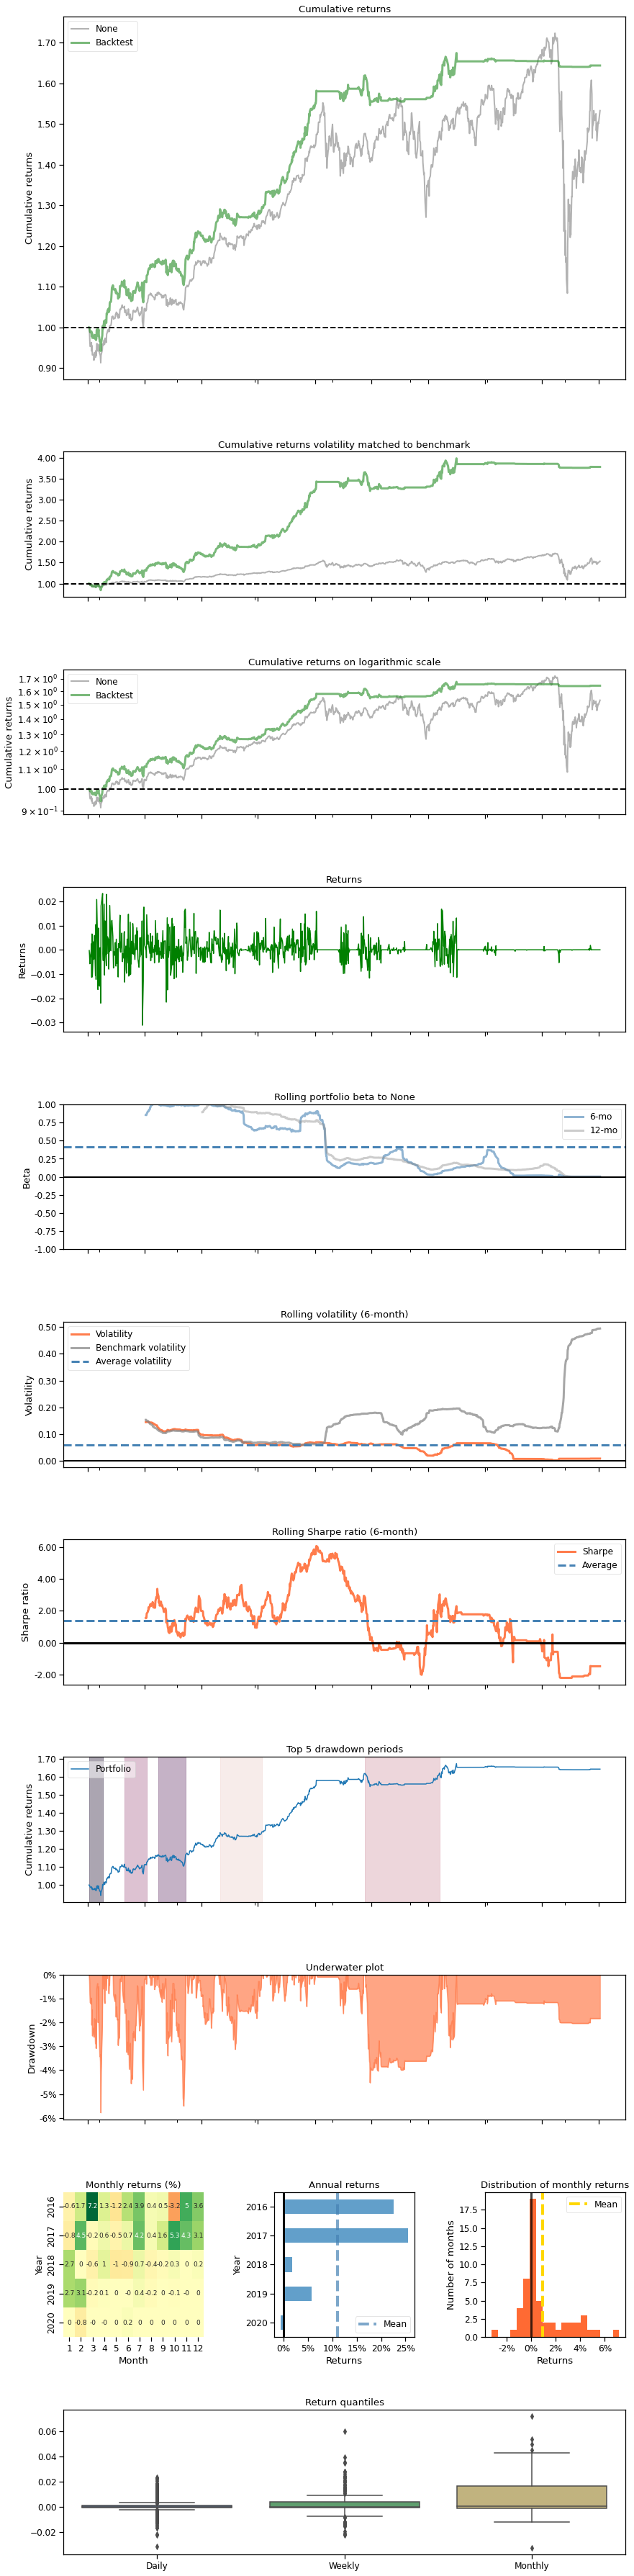

In [27]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ppo_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [28]:
ppo_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ppo_1':['44.445%','8.515%','8.048%','1.06','-8.263%'],
                          'dji_ppo_2':['44.941%','8.598%','7.249%','1.18','-5.482%'],
                          'dji_ppo_3':['40.389%','7.832%','6.74%','1.15','-5.13%'],
                          'dji_ppo_4':['50.444%','9.501%','7.56%','1.24','-8.602%'],
                          'dji_ppo_5':['64.375%','11.677%','7.324%','1.55','-5.776%'],
                          }
ppo_performance_evaluation = pd.DataFrame(ppo_performance_evaluation).set_index(term)
ppo_performance_evaluation.to_csv('performance/ppo_performance_evaluation_comparison.csv',index=True)
display(ppo_performance_evaluation)

dji_ppo_1 dji_ppo_2 dji_ppo_3 dji_ppo_4 dji_ppo_5
(2016/01/04-2020/07/06)                                                  
Cumulative Return         44.445%   44.941%   40.389%   50.444%   64.375%
Annual Return              8.515%    8.598%    7.832%    9.501%   11.677%
Annual Volatility          8.048%    7.249%     6.74%     7.56%    7.324%
Sharpe Ratio                 1.06      1.18      1.15      1.24      1.55
Max Dragdown              -8.263%   -5.482%    -5.13%   -8.602%   -5.776%

In [29]:
ppo_performance_evaluation_transpose = ppo_performance_evaluation.T
ppo_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ppo_performance_evaluation_transpose = ppo_performance_evaluation_transpose.apply(pd.to_numeric)
display(ppo_performance_evaluation_transpose)
display(ppo_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ppo_1                           44.445          8.515              8.048   
dji_ppo_2                           44.941          8.598              7.249   
dji_ppo_3                           40.389          7.832              6.740   
dji_ppo_4                           50.444          9.501              7.560   
dji_ppo_5                           64.375         11.677              7.324   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ppo_1                        1.06        -8.263  
dji_ppo_2                        1.18        -5.482  
dji_ppo_3                        1.15        -5.130  
dji_ppo_4                        1.24        -8.602  
dji_ppo_5                        1.55        -5.776

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [30]:
ppo_performance_evaluation_transpose['Cumulative Return'].mean()
#ppo_performance_evaluation_transpose['Annual Return'].mean()
#ppo_performance_evaluation_transpose['Annual Volatility'].mean()
#ppo_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ppo_performance_evaluation_transpose['Max Dragdown'].mean()

48.9188

## A2C

In [31]:
dji_a2c_1_account_value = get_account_value(63, 63, 'dji', 'a2c','A2C', 1)
dji_a2c_2_account_value = get_account_value(63, 63, 'dji', 'a2c','A2C', 2)
dji_a2c_3_account_value = get_account_value(63, 63, 'dji', 'a2c','A2C', 3)
dji_a2c_4_account_value = get_account_value(63, 63, 'dji', 'a2c','A2C', 4)
dji_a2c_5_account_value = get_account_value(63, 63, 'dji', 'a2c','A2C', 5)
display(dji_a2c_1_account_value)

account_value  datadate
0      1.000000e+06  20160104
1      9.994486e+05  20160105
2      9.959443e+05  20160106
3      9.890535e+05  20160107
4      9.868522e+05  20160108
...             ...       ...
1129   1.525545e+06  20200629
1130   1.525545e+06  20200630
1131   1.525545e+06  20200701
1132   1.525545e+06  20200702
1133   1.525545e+06  20200706

[1134 rows x 2 columns]

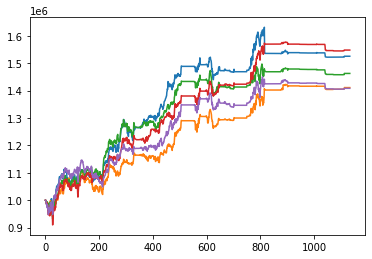

In [32]:
dji_a2c_1_account_value.account_value.plot()
dji_a2c_2_account_value.account_value.plot()
dji_a2c_3_account_value.account_value.plot()
dji_a2c_4_account_value.account_value.plot()
dji_a2c_5_account_value.account_value.plot()

In [33]:
dji_a2c_1_account_value = get_daily_return(dji_a2c_1_account_value)
dji_a2c_2_account_value = get_daily_return(dji_a2c_2_account_value)
dji_a2c_3_account_value = get_daily_return(dji_a2c_3_account_value)
dji_a2c_4_account_value = get_daily_return(dji_a2c_4_account_value)
dji_a2c_5_account_value = get_daily_return(dji_a2c_5_account_value)

In [34]:
dji_a2c_1_account_value['Date'] = test_dji['Date']
dji_a2c_2_account_value['Date'] = test_dji['Date']
dji_a2c_3_account_value['Date'] = test_dji['Date']
dji_a2c_4_account_value['Date'] = test_dji['Date']
dji_a2c_5_account_value['Date'] = test_dji['Date']

In [35]:
dji_a2c_1_strat = backtest_strat(dji_a2c_1_account_value)
dji_a2c_2_strat = backtest_strat(dji_a2c_2_account_value)
dji_a2c_3_strat = backtest_strat(dji_a2c_3_account_value)
dji_a2c_4_strat = backtest_strat(dji_a2c_4_account_value)
dji_a2c_5_strat = backtest_strat(dji_a2c_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


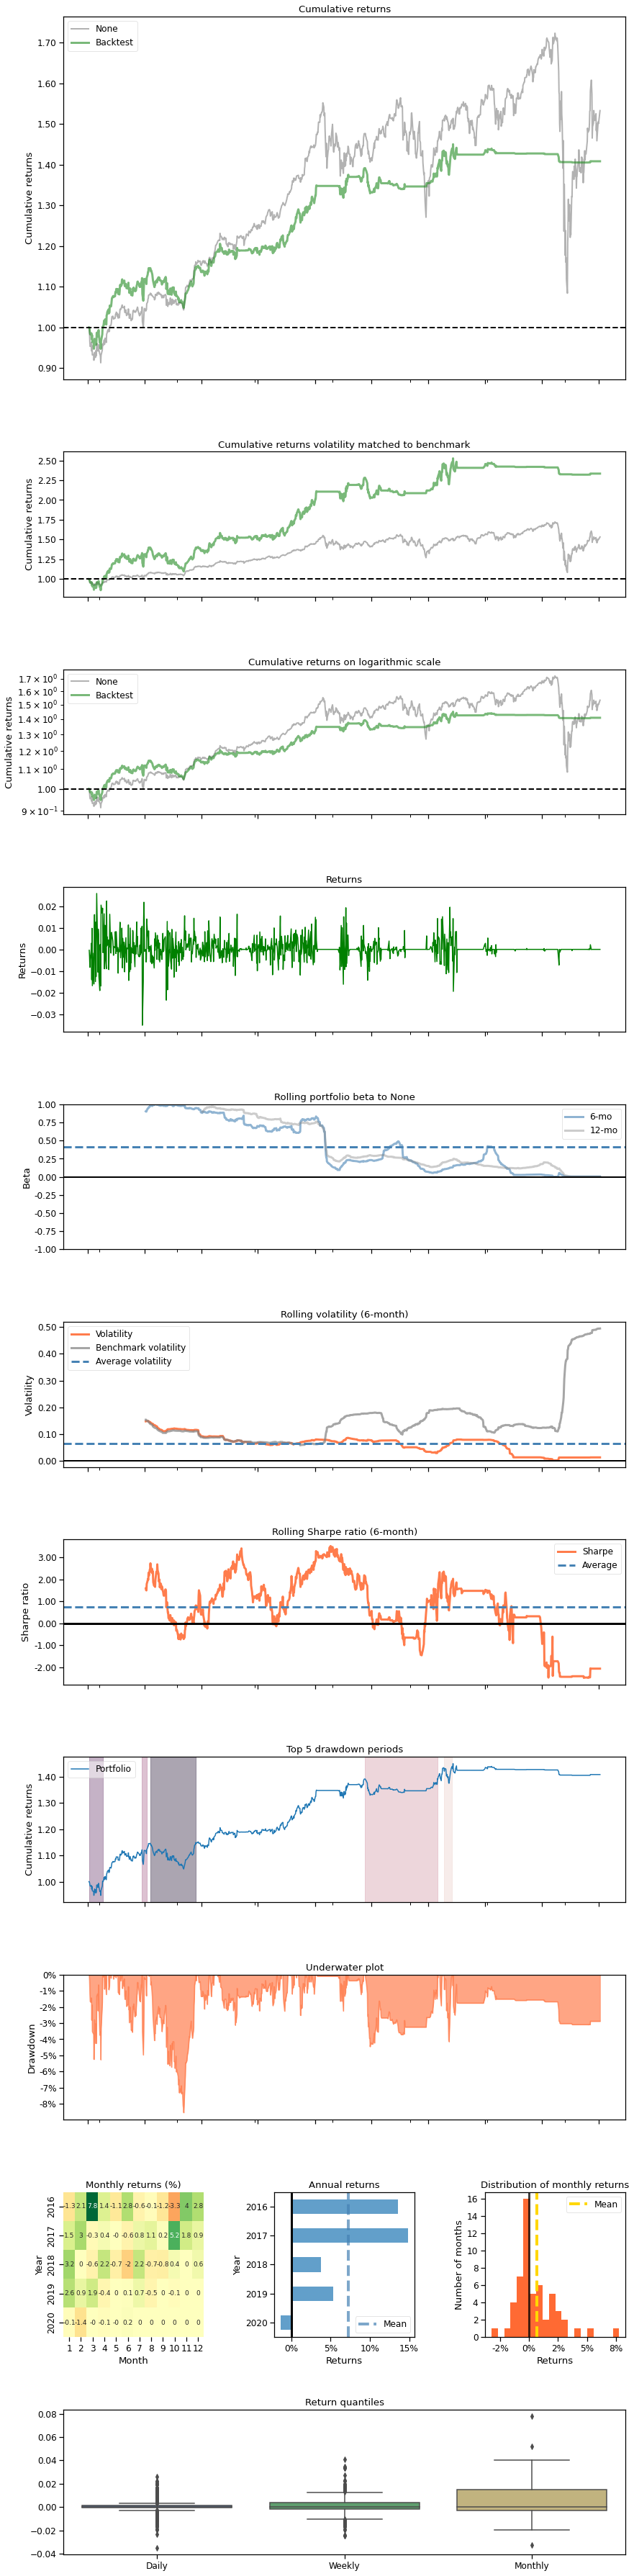

In [36]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_a2c_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [37]:
a2c_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_a2c_1':['52.554%','9.84%','8.651%','1.13','-7.24%'],
                          'dji_a2c_2':['41.109%','7.953%','7.757%','1.03','-7.663%'],
                          'dji_a2c_3':['46.276%','8.819%','8.133%','1.08','-6.928%'],
                          'dji_a2c_4':['54.805%','10.198%','8.335%','1.21','-9.035%'],
                          'dji_a2c_5':['40.843%','7.908%','7.749%','1.02','-8.534%'],
                          }
a2c_performance_evaluation = pd.DataFrame(a2c_performance_evaluation).set_index(term)
a2c_performance_evaluation.to_csv('performance/a2c_performance_evaluation_comparison.csv',index=True)
display(a2c_performance_evaluation)

dji_a2c_1 dji_a2c_2 dji_a2c_3 dji_a2c_4 dji_a2c_5
(2016/01/04-2020/07/06)                                                  
Cumulative Return         52.554%   41.109%   46.276%   54.805%   40.843%
Annual Return               9.84%    7.953%    8.819%   10.198%    7.908%
Annual Volatility          8.651%    7.757%    8.133%    8.335%    7.749%
Sharpe Ratio                 1.13      1.03      1.08      1.21      1.02
Max Dragdown               -7.24%   -7.663%   -6.928%   -9.035%   -8.534%

In [38]:
a2c_performance_evaluation_transpose = a2c_performance_evaluation.T
a2c_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
a2c_performance_evaluation_transpose = a2c_performance_evaluation_transpose.apply(pd.to_numeric)
display(a2c_performance_evaluation_transpose)
display(a2c_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_a2c_1                           52.554          9.840              8.651   
dji_a2c_2                           41.109          7.953              7.757   
dji_a2c_3                           46.276          8.819              8.133   
dji_a2c_4                           54.805         10.198              8.335   
dji_a2c_5                           40.843          7.908              7.749   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_a2c_1                        1.13        -7.240  
dji_a2c_2                        1.03        -7.663  
dji_a2c_3                        1.08        -6.928  
dji_a2c_4                        1.21        -9.035  
dji_a2c_5                        1.02        -8.534

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [39]:
a2c_performance_evaluation_transpose['Cumulative Return'].mean()
#a2c_performance_evaluation_transpose['Annual Return'].mean()
#a2c_performance_evaluation_transpose['Annual Volatility'].mean()
#a2c_performance_evaluation_transpose['Sharpe Ratio'].mean()
#a2c_performance_evaluation_transpose['Max Dragdown'].mean()

47.117399999999996

## DDPG

In [40]:
dji_ddpg_1_account_value = get_account_value(63, 63, 'dji', 'ddpg','ddpg', 1)
dji_ddpg_2_account_value = get_account_value(63, 63, 'dji', 'ddpg','ddpg', 2)
dji_ddpg_3_account_value = get_account_value(63, 63, 'dji', 'ddpg','ddpg', 3)
dji_ddpg_4_account_value = get_account_value(63, 63, 'dji', 'ddpg','ddpg', 4)
dji_ddpg_5_account_value = get_account_value(63, 63, 'dji', 'ddpg','ddpg', 5)
display(dji_ddpg_1_account_value)

account_value  datadate
0      1.000000e+06  20160104
1      1.000301e+06  20160105
2      9.966393e+05  20160106
3      9.879400e+05  20160107
4      9.828171e+05  20160108
...             ...       ...
1129   1.672721e+06  20200629
1130   1.672721e+06  20200630
1131   1.672721e+06  20200701
1132   1.672721e+06  20200702
1133   1.672721e+06  20200706

[1134 rows x 2 columns]

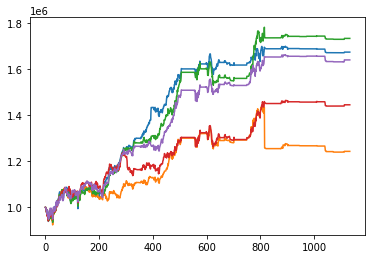

In [41]:
dji_ddpg_1_account_value.account_value.plot()
dji_ddpg_2_account_value.account_value.plot()
dji_ddpg_3_account_value.account_value.plot()
dji_ddpg_4_account_value.account_value.plot()
dji_ddpg_5_account_value.account_value.plot()

In [42]:
dji_ddpg_1_account_value = get_daily_return(dji_ddpg_1_account_value)
dji_ddpg_2_account_value = get_daily_return(dji_ddpg_2_account_value)
dji_ddpg_3_account_value = get_daily_return(dji_ddpg_3_account_value)
dji_ddpg_4_account_value = get_daily_return(dji_ddpg_4_account_value)
dji_ddpg_5_account_value = get_daily_return(dji_ddpg_5_account_value)

In [43]:
dji_ddpg_1_account_value['Date'] = test_dji['Date']
dji_ddpg_2_account_value['Date'] = test_dji['Date']
dji_ddpg_3_account_value['Date'] = test_dji['Date']
dji_ddpg_4_account_value['Date'] = test_dji['Date']
dji_ddpg_5_account_value['Date'] = test_dji['Date']

In [44]:
dji_ddpg_1_strat = backtest_strat(dji_ddpg_1_account_value)
dji_ddpg_2_strat = backtest_strat(dji_ddpg_2_account_value)
dji_ddpg_3_strat = backtest_strat(dji_ddpg_3_account_value)
dji_ddpg_4_strat = backtest_strat(dji_ddpg_4_account_value)
dji_ddpg_5_strat = backtest_strat(dji_ddpg_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


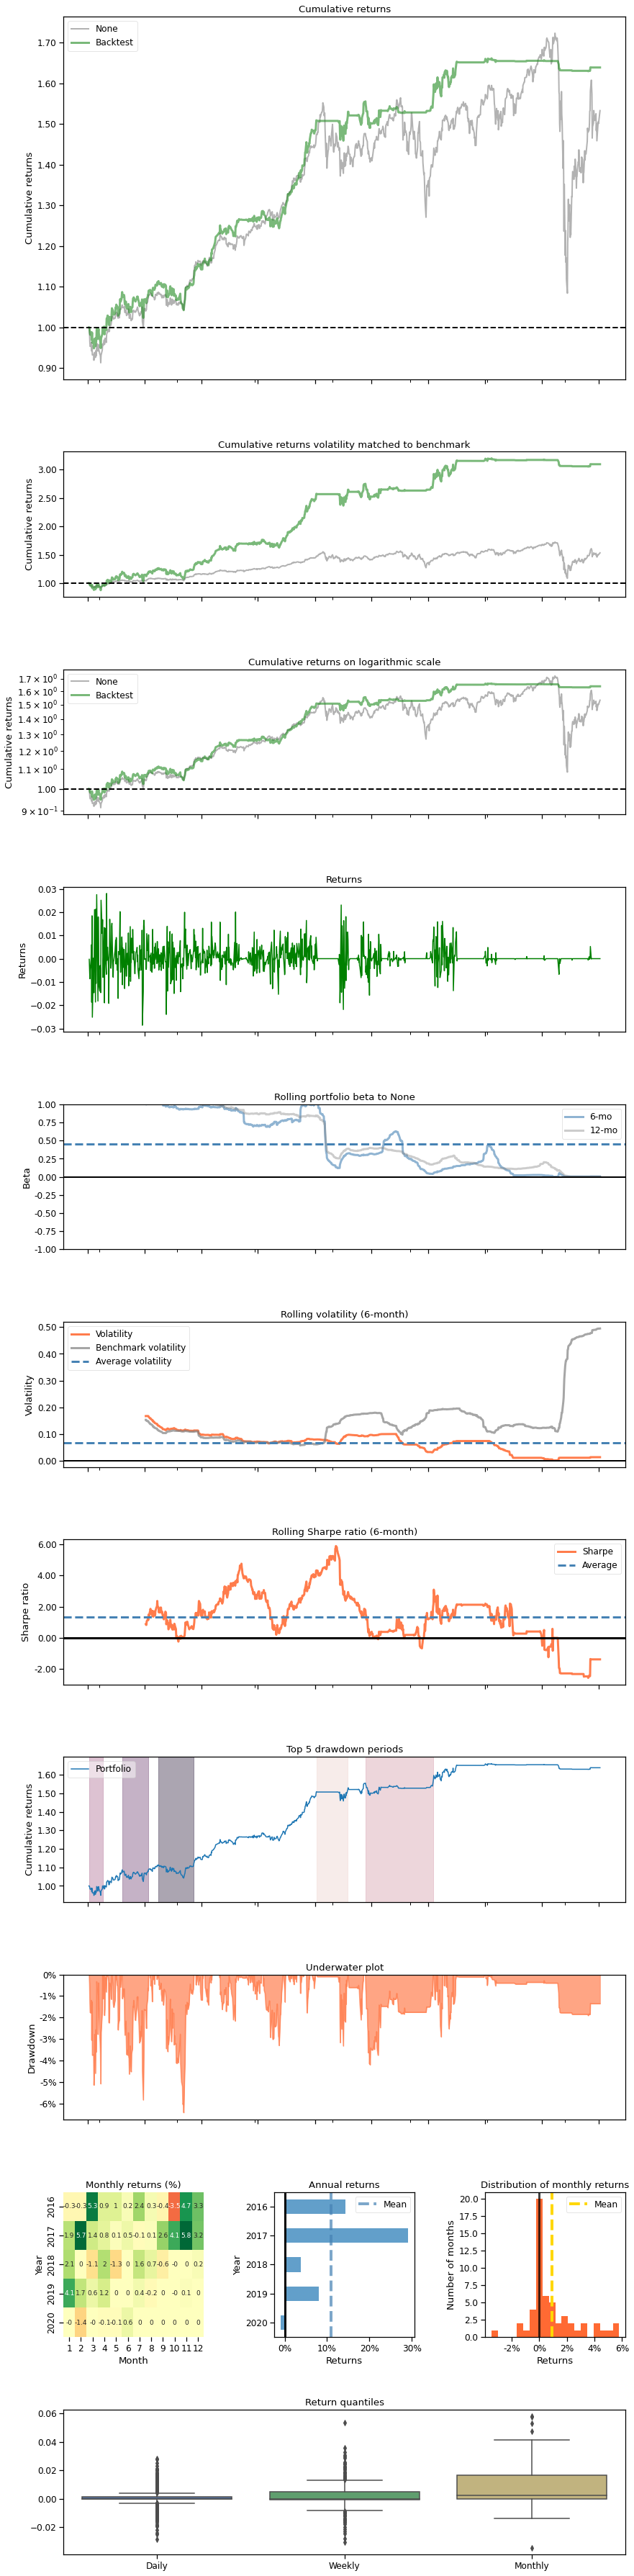

In [45]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_ddpg_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [46]:
ddpg_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_ddpg_1':['67.272%','12.111%','8.313%','1.42','-8.551%'],
                          'dji_ddpg_2':['24.274%','4.948%','10.309%','0.52','-13.927%'],
                          'dji_ddpg_3':['73.216%','12.985%','8.199%','1.53','-6.919%'],
                          'dji_ddpg_4':['44.448%','8.515%','8.82%','0.97','-8.296%'],
                          'dji_ddpg_5':['63.891%','11.604%','8.55%','1.33','-6.418%'],
                          }
ddpg_performance_evaluation = pd.DataFrame(ddpg_performance_evaluation).set_index(term)
ddpg_performance_evaluation.to_csv('performance/ddpg_performance_evaluation_comparison.csv',index=True)
display(ddpg_performance_evaluation)

dji_ddpg_1 dji_ddpg_2 dji_ddpg_3 dji_ddpg_4 dji_ddpg_5
(2016/01/04-2020/07/06)                                                       
Cumulative Return          67.272%    24.274%    73.216%    44.448%    63.891%
Annual Return              12.111%     4.948%    12.985%     8.515%    11.604%
Annual Volatility           8.313%    10.309%     8.199%      8.82%      8.55%
Sharpe Ratio                  1.42       0.52       1.53       0.97       1.33
Max Dragdown               -8.551%   -13.927%    -6.919%    -8.296%    -6.418%

In [47]:
ddpg_performance_evaluation_transpose = ddpg_performance_evaluation.T
ddpg_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ddpg_performance_evaluation_transpose = ddpg_performance_evaluation_transpose.apply(pd.to_numeric)
display(ddpg_performance_evaluation_transpose)
display(ddpg_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_ddpg_1                          67.272         12.111              8.313   
dji_ddpg_2                          24.274          4.948             10.309   
dji_ddpg_3                          73.216         12.985              8.199   
dji_ddpg_4                          44.448          8.515              8.820   
dji_ddpg_5                          63.891         11.604              8.550   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_ddpg_1                       1.42        -8.551  
dji_ddpg_2                       0.52       -13.927  
dji_ddpg_3                       1.53        -6.919  
dji_ddpg_4                       0.97        -8.296  
dji_ddpg_5                       1.33        -6.418

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [48]:
ddpg_performance_evaluation_transpose['Cumulative Return'].mean()
#ddpg_performance_evaluation_transpose['Annual Return'].mean()
#ddpg_performance_evaluation_transpose['Annual Volatility'].mean()
#ddpg_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ddpg_performance_evaluation_transpose['Max Dragdown'].mean()

54.6202

## Remake Ensemble

In [49]:
dji_remakeEnsemble_1_account_value = get_account_value(63, 63, 'dji', 'remakeEnsemble','remake_ensemble', 1)
dji_remakeEnsemble_2_account_value = get_account_value(63, 63, 'dji', 'remakeEnsemble','remake_ensemble', 2)
dji_remakeEnsemble_3_account_value = get_account_value(63, 63, 'dji', 'remakeEnsemble','remake_ensemble', 3)
dji_remakeEnsemble_4_account_value = get_account_value(63, 63, 'dji', 'remakeEnsemble','remake_ensemble', 4)
dji_remakeEnsemble_5_account_value = get_account_value(63, 63, 'dji', 'remakeEnsemble','remake_ensemble', 5)
display(dji_remakeEnsemble_1_account_value)

account_value  datadate
0      1.000000e+06  20160104
1      9.998789e+05  20160105
2      9.951998e+05  20160106
3      9.859990e+05  20160107
4      9.810952e+05  20160108
...             ...       ...
1129   1.453225e+06  20200629
1130   1.453225e+06  20200630
1131   1.453225e+06  20200701
1132   1.453225e+06  20200702
1133   1.453225e+06  20200706

[1134 rows x 2 columns]

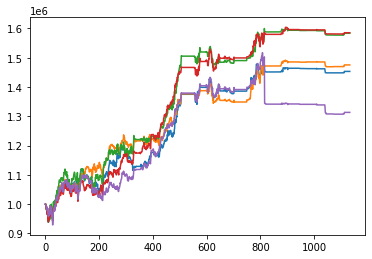

In [50]:
dji_remakeEnsemble_1_account_value.account_value.plot()
dji_remakeEnsemble_2_account_value.account_value.plot()
dji_remakeEnsemble_3_account_value.account_value.plot()
dji_remakeEnsemble_4_account_value.account_value.plot()
dji_remakeEnsemble_5_account_value.account_value.plot()

In [51]:
dji_remakeEnsemble_1_account_value = get_daily_return(dji_remakeEnsemble_1_account_value)
dji_remakeEnsemble_2_account_value = get_daily_return(dji_remakeEnsemble_2_account_value)
dji_remakeEnsemble_3_account_value = get_daily_return(dji_remakeEnsemble_3_account_value)
dji_remakeEnsemble_4_account_value = get_daily_return(dji_remakeEnsemble_4_account_value)
dji_remakeEnsemble_5_account_value = get_daily_return(dji_remakeEnsemble_5_account_value)

In [52]:
dji_remakeEnsemble_1_account_value['Date'] = test_dji['Date']
dji_remakeEnsemble_2_account_value['Date'] = test_dji['Date']
dji_remakeEnsemble_3_account_value['Date'] = test_dji['Date']
dji_remakeEnsemble_4_account_value['Date'] = test_dji['Date']
dji_remakeEnsemble_5_account_value['Date'] = test_dji['Date']

In [53]:
dji_remakeEnsemble_1_strat = backtest_strat(dji_remakeEnsemble_1_account_value)
dji_remakeEnsemble_2_strat = backtest_strat(dji_remakeEnsemble_2_account_value)
dji_remakeEnsemble_3_strat = backtest_strat(dji_remakeEnsemble_3_account_value)
dji_remakeEnsemble_4_strat = backtest_strat(dji_remakeEnsemble_4_account_value)
dji_remakeEnsemble_5_strat = backtest_strat(dji_remakeEnsemble_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


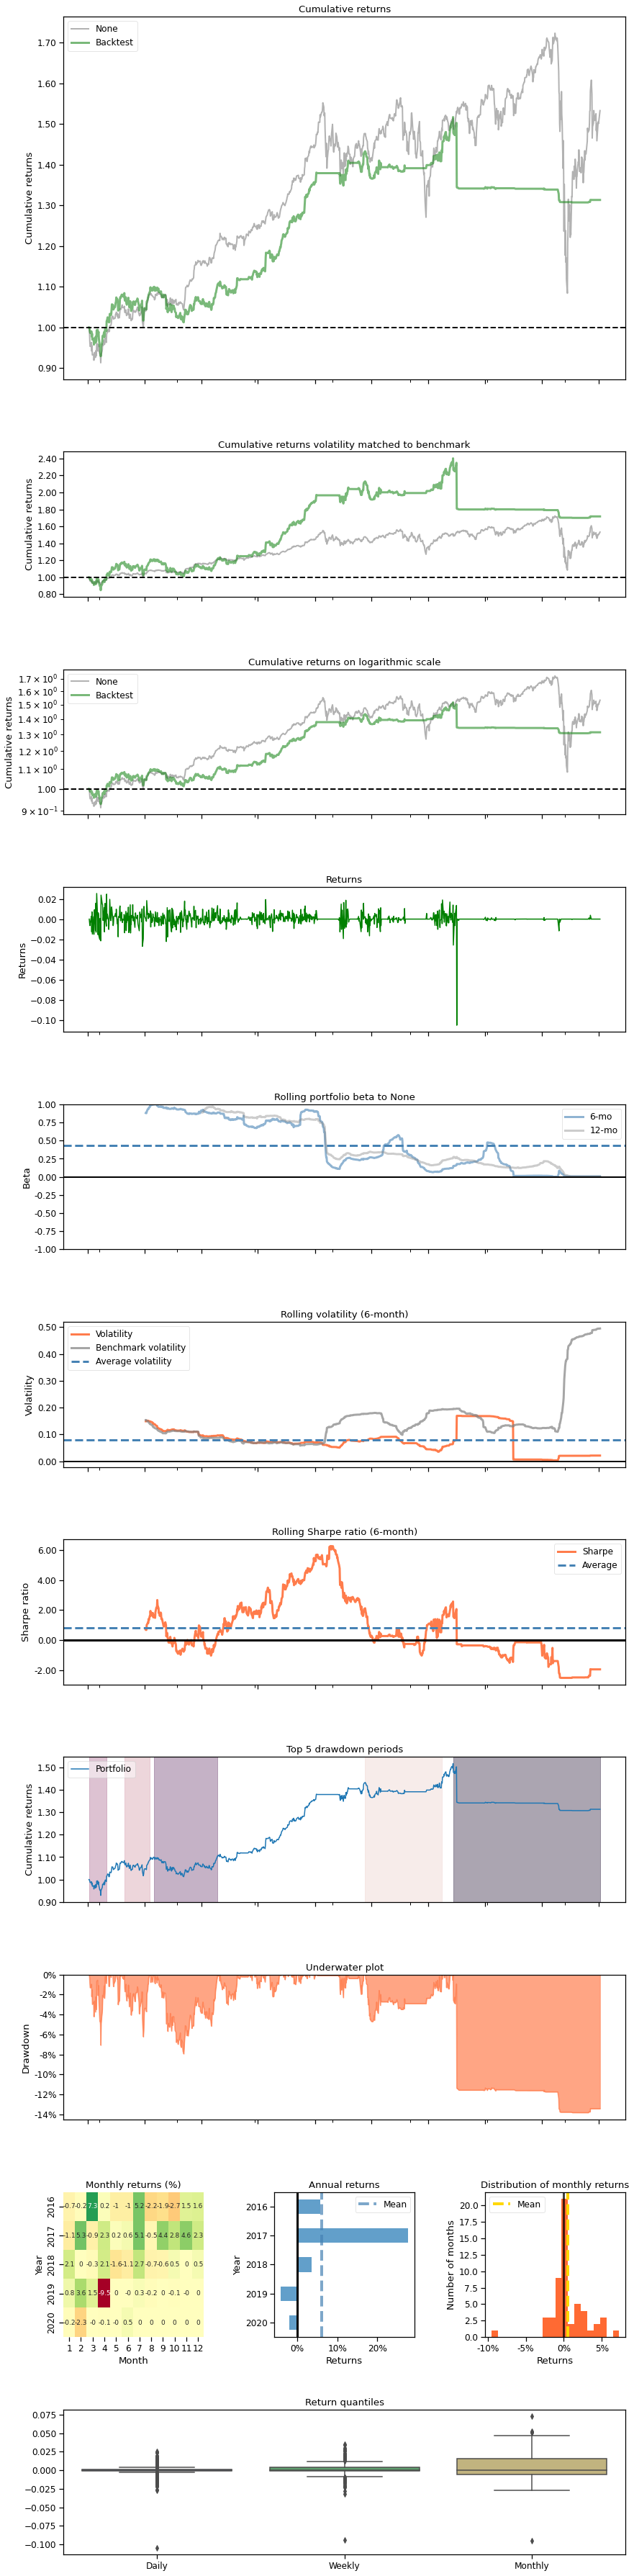

In [54]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dji_remakeEnsemble_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [55]:
remakeEnsemble_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'dji_remakeEnsemble_1':['45.323%','8.661%','8.375%','1.03','-7.435%'],
                          'dji_remakeEnsemble_2':['47.537%','9.027%','7.398%','1.21','-5.49%'],
                          'dji_remakeEnsemble_3':['58.362%','10.756%','8.461%','1.25','-6.521%'],
                          'dji_remakeEnsemble_4':['58.526%','10.781%','7.742%','1.36','-6.074%'],
                          'dji_remakeEnsemble_5':['31.335%','6.245%','9.377%','0.69','-13.833%'],
                          }
remakeEnsemble_performance_evaluation = pd.DataFrame(remakeEnsemble_performance_evaluation).set_index(term)
remakeEnsemble_performance_evaluation.to_csv('performance/remakeEnsemble_performance_evaluation_comparison.csv',index=True)
display(remakeEnsemble_performance_evaluation)

dji_remakeEnsemble_1 dji_remakeEnsemble_2  \
(2016/01/04-2020/07/06)                                             
Cumulative Return                    45.323%              47.537%   
Annual Return                         8.661%               9.027%   
Annual Volatility                     8.375%               7.398%   
Sharpe Ratio                            1.03                 1.21   
Max Dragdown                         -7.435%               -5.49%   

                        dji_remakeEnsemble_3 dji_remakeEnsemble_4  \
(2016/01/04-2020/07/06)                                             
Cumulative Return                    58.362%              58.526%   
Annual Return                        10.756%              10.781%   
Annual Volatility                     8.461%               7.742%   
Sharpe Ratio                            1.25                 1.36   
Max Dragdown                         -6.521%              -6.074%   

                        dji_remakeEnsemble_5  
(2016/01/04-2020/07/06)                       
Cumulative Return                    31.335%  
Annual Return                         6.245%  
Annual Volatility                     9.377%  
Sharpe Ratio                            0.69  
Max Dragdown                        -13.833%

In [56]:
remakeEnsemble_performance_evaluation_transpose = remakeEnsemble_performance_evaluation.T
remakeEnsemble_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
remakeEnsemble_performance_evaluation_transpose = remakeEnsemble_performance_evaluation_transpose.apply(pd.to_numeric)
display(remakeEnsemble_performance_evaluation_transpose)
display(remakeEnsemble_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/06)  Cumulative Return  Annual Return  Annual Volatility  \
dji_remakeEnsemble_1                45.323          8.661              8.375   
dji_remakeEnsemble_2                47.537          9.027              7.398   
dji_remakeEnsemble_3                58.362         10.756              8.461   
dji_remakeEnsemble_4                58.526         10.781              7.742   
dji_remakeEnsemble_5                31.335          6.245              9.377   

(2016/01/04-2020/07/06)  Sharpe Ratio  Max Dragdown  
dji_remakeEnsemble_1             1.03        -7.435  
dji_remakeEnsemble_2             1.21        -5.490  
dji_remakeEnsemble_3             1.25        -6.521  
dji_remakeEnsemble_4             1.36        -6.074  
dji_remakeEnsemble_5             0.69       -13.833

(2016/01/04-2020/07/06)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [57]:
remakeEnsemble_performance_evaluation_transpose['Cumulative Return'].mean()
#remakeEnsemble_performance_evaluation_transpose['Annual Return'].mean()
#remakeEnsemble_performance_evaluation_transpose['Annual Volatility'].mean()
#remakeEnsemble_performance_evaluation_transpose['Sharpe Ratio'].mean()
#remakeEnsemble_performance_evaluation_transpose['Max Dragdown'].mean()

48.2166

## Visualization

In [58]:
df = pd.DataFrame(columns=['data','agent','Cumulative Return'])
agent = ['ensemble','ppo','a2c','ddpg','remakeEnsemble']
performance_evaluation_transpose = [ensemble_performance_evaluation_transpose,
                                   ppo_performance_evaluation_transpose,
                                   a2c_performance_evaluation_transpose,
                                   ddpg_performance_evaluation_transpose,
                                   remakeEnsemble_performance_evaluation_transpose]

for i in range(len(agent)):
    for j in range(5):
        dic = {}
        dic['data']='dji'
        dic['agent']= agent[i]
        dic['Cumulative Return']= performance_evaluation_transpose[i]['Cumulative Return'][j]
        df = df.append(dic,ignore_index=True)

display(df)

data           agent  Cumulative Return
0   dji        ensemble             49.604
1   dji        ensemble             51.610
2   dji        ensemble             43.041
3   dji        ensemble             81.434
4   dji        ensemble             44.270
5   dji             ppo             44.445
6   dji             ppo             44.941
7   dji             ppo             40.389
8   dji             ppo             50.444
9   dji             ppo             64.375
10  dji             a2c             52.554
11  dji             a2c             41.109
12  dji             a2c             46.276
13  dji             a2c             54.805
14  dji             a2c             40.843
15  dji            ddpg             67.272
16  dji            ddpg             24.274
17  dji            ddpg             73.216
18  dji            ddpg             44.448
19  dji            ddpg             63.891
20  dji  remakeEnsemble             45.323
21  dji  remakeEnsemble             47.537
22  dji  remakeEnsemble             58.362
23  dji  remakeEnsemble             58.526
24  dji  remakeEnsemble             31.335

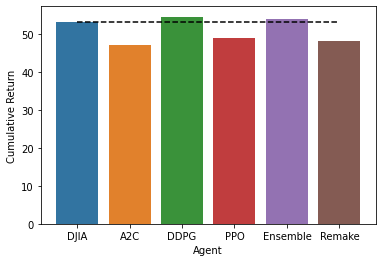

In [68]:
real_dji = 53.287
ensemble_mean = df[df.agent=='ensemble']['Cumulative Return'].mean()
ppo_mean = df[df.agent=='ppo']['Cumulative Return'].mean()
a2c_mean = df[df.agent=='a2c']['Cumulative Return'].mean()
ddpg_mean = df[df.agent=='ddpg']['Cumulative Return'].mean()
remakeEnsemble_mean = df[df.agent=='remakeEnsemble']['Cumulative Return'].mean()
cumulative_return_mean = [real_dji, a2c_mean, ddpg_mean, ppo_mean, ensemble_mean, remakeEnsemble_mean]
agent = ['DJIA','A2C','DDPG','PPO','Ensemble','Remake']
sns.barplot(y=cumulative_return_mean, x=agent )
sns.lineplot(y=real_dji,x=agent,color='black',linestyle='--')
#plt.title("each agent's average culmulative return on DJ stocks")
plt.xlabel('Agent')
plt.ylabel('Cumulative Return')
plt.savefig('./performance/dji_agent_mean.png',dpi=1000)

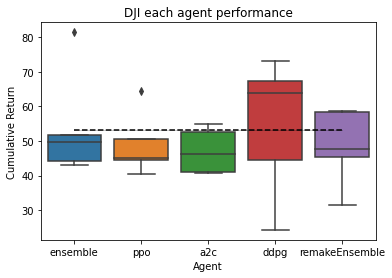

In [60]:
sns.boxplot(y=df['Cumulative Return'], x = df['agent'])
sns.lineplot(y=real_dji,x=df['agent'],color='black',linestyle='--')
plt.title('DJI each agent performance')
plt.xlabel('Agent')
plt.ylabel('Cumulative Return')
plt.savefig('./performance/dji_agent_performance.png',dpi=500)